In [1]:
import uproot  # For loading ROOT files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
from dataAnalyse import CCV2
from torch_geometric.data import DataLoader 

In [3]:
df_CERN = pd.read_csv('df_CERN.csv')
df_scores = pd.read_csv('df_scores.csv')


In [4]:
testpath = "/vols/cms/mm1221/Data/2pi/test/"  # Replace with your ROOT file path
data_test = CCV2(testpath, max_events=12000, inp = 'test')

test_loader = DataLoader(data_test, batch_size=1, shuffle=False, follow_batch=['x'])

### Loading tracksters data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:22<00:00, 22.43s/it]
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [5]:
data_path = '/vols/cms/mm1221/Data/2pi/test/raw/test.root'
data_file = uproot.open(data_path)

Track_ind = data_file['tracksters;1']['vertices_indexes'].array()
GT_ind = data_file['simtrackstersCP;1']['vertices_indexes'].array()
GT_bc = data_file['simtrackstersCP;1']['barycenter_x'].array()
energies = data_file['clusters;2']['energy'].array()
LC_x = data_file['clusters;2']['position_x'].array()
LC_y = data_file['clusters;2']['position_y'].array()
LC_z = data_file['clusters;2']['position_z'].array()
LC_eta = data_file['clusters;2']['position_eta'].array()
MT_ind = data_file['trackstersMerged;2']['vertices_indexes'].array()

skim_mask = []
for e in GT_bc:
    if len(e) == 2:
        skim_mask.append(True)
    else:
        skim_mask.append(False)
        
GT_ind = GT_ind[skim_mask]
energies = energies[skim_mask]
Track_ind = Track_ind[skim_mask]
MT_ind = MT_ind[skim_mask]

LC_x = LC_x[skim_mask]
LC_y = LC_y[skim_mask]
LC_z = LC_z[skim_mask]
LC_eta = LC_eta[skim_mask]

In [6]:
#0.0005,32,256,5,0.2,12,128
# Initialize model and load state dictionary
from model import Net
model = Net(hidden_dim = 256, num_layers = 5, dropout = 0.2, contrastive_dim = 128)
checkpoint= torch.load('/vols/cms/mm1221/hgcal/TrackPi/StaticEdge/results/init/results_lr0.0005_bs32_hd256_nl5_do0.2_k12_cd128/best_model.pt',  map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)  # Directly use the loaded checkpoint
model.eval()  # Set model to evaluation mode

Net(
  (lc_encode): Sequential(
    (0): Linear(in_features=15, out_features=256, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ELU(alpha=1.0)
  )
  (convs): ModuleList(
    (0-4): 5 x CustomStaticEdgeConv(
      (nn_module): Sequential(
        (0): Linear(in_features=512, out_features=256, bias=True)
        (1): ELU(alpha=1.0)
        (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (output): Sequential(
    (0): Linear(in_features=256, out_features=32, bias=True)
    (1): ELU(alpha=1.0)
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=32, out_features=16, bias=True)
    (4): ELU(alpha=1.0)
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=16, out_features=128, bias=True)
  )
)

In [7]:
from torch_geometric.nn import knn_graph

all_predictions = []  # List to store predictions for all events

# Loop through all events in the test dataset
for i, data in enumerate(data_test):
    print(f"Processing event {i+1}/{len(data_test)}...")

    # Compute k-nearest neighbor graph for the event
    edge_index = knn_graph(data.x, k=12)  # Adjust 'k' as needed
    
    # Generate predictions for the event
    predictions = model(data.x, edge_index, 1)
    
    # Store predictions
    all_predictions.append(predictions[0].detach().cpu().numpy())  # Convert to numpy if needed

# Convert list of predictions to a single numpy array
all_predictions = np.array(all_predictions)

# Print result
print("Predictions for all events shape:", all_predictions.shape)


Processing event 1/3530...
Processing event 2/3530...
Processing event 3/3530...
Processing event 4/3530...
Processing event 5/3530...
Processing event 6/3530...
Processing event 7/3530...
Processing event 8/3530...
Processing event 9/3530...
Processing event 10/3530...
Processing event 11/3530...
Processing event 12/3530...
Processing event 13/3530...
Processing event 14/3530...
Processing event 15/3530...
Processing event 16/3530...
Processing event 17/3530...
Processing event 18/3530...
Processing event 19/3530...
Processing event 20/3530...
Processing event 21/3530...
Processing event 22/3530...
Processing event 23/3530...
Processing event 24/3530...
Processing event 25/3530...
Processing event 26/3530...
Processing event 27/3530...
Processing event 28/3530...
Processing event 29/3530...
Processing event 30/3530...
Processing event 31/3530...
Processing event 32/3530...
Processing event 33/3530...
Processing event 34/3530...
Processing event 35/3530...
Processing event 36/3530...
P

Processing event 289/3530...
Processing event 290/3530...
Processing event 291/3530...
Processing event 292/3530...
Processing event 293/3530...
Processing event 294/3530...
Processing event 295/3530...
Processing event 296/3530...
Processing event 297/3530...
Processing event 298/3530...
Processing event 299/3530...
Processing event 300/3530...
Processing event 301/3530...
Processing event 302/3530...
Processing event 303/3530...
Processing event 304/3530...
Processing event 305/3530...
Processing event 306/3530...
Processing event 307/3530...
Processing event 308/3530...
Processing event 309/3530...
Processing event 310/3530...
Processing event 311/3530...
Processing event 312/3530...
Processing event 313/3530...
Processing event 314/3530...
Processing event 315/3530...
Processing event 316/3530...
Processing event 317/3530...
Processing event 318/3530...
Processing event 319/3530...
Processing event 320/3530...
Processing event 321/3530...
Processing event 322/3530...
Processing eve

Processing event 580/3530...
Processing event 581/3530...
Processing event 582/3530...
Processing event 583/3530...
Processing event 584/3530...
Processing event 585/3530...
Processing event 586/3530...
Processing event 587/3530...
Processing event 588/3530...
Processing event 589/3530...
Processing event 590/3530...
Processing event 591/3530...
Processing event 592/3530...
Processing event 593/3530...
Processing event 594/3530...
Processing event 595/3530...
Processing event 596/3530...
Processing event 597/3530...
Processing event 598/3530...
Processing event 599/3530...
Processing event 600/3530...
Processing event 601/3530...
Processing event 602/3530...
Processing event 603/3530...
Processing event 604/3530...
Processing event 605/3530...
Processing event 606/3530...
Processing event 607/3530...
Processing event 608/3530...
Processing event 609/3530...
Processing event 610/3530...
Processing event 611/3530...
Processing event 612/3530...
Processing event 613/3530...
Processing eve

Processing event 883/3530...
Processing event 884/3530...
Processing event 885/3530...
Processing event 886/3530...
Processing event 887/3530...
Processing event 888/3530...
Processing event 889/3530...
Processing event 890/3530...
Processing event 891/3530...
Processing event 892/3530...
Processing event 893/3530...
Processing event 894/3530...
Processing event 895/3530...
Processing event 896/3530...
Processing event 897/3530...
Processing event 898/3530...
Processing event 899/3530...
Processing event 900/3530...
Processing event 901/3530...
Processing event 902/3530...
Processing event 903/3530...
Processing event 904/3530...
Processing event 905/3530...
Processing event 906/3530...
Processing event 907/3530...
Processing event 908/3530...
Processing event 909/3530...
Processing event 910/3530...
Processing event 911/3530...
Processing event 912/3530...
Processing event 913/3530...
Processing event 914/3530...
Processing event 915/3530...
Processing event 916/3530...
Processing eve

Processing event 1164/3530...
Processing event 1165/3530...
Processing event 1166/3530...
Processing event 1167/3530...
Processing event 1168/3530...
Processing event 1169/3530...
Processing event 1170/3530...
Processing event 1171/3530...
Processing event 1172/3530...
Processing event 1173/3530...
Processing event 1174/3530...
Processing event 1175/3530...
Processing event 1176/3530...
Processing event 1177/3530...
Processing event 1178/3530...
Processing event 1179/3530...
Processing event 1180/3530...
Processing event 1181/3530...
Processing event 1182/3530...
Processing event 1183/3530...
Processing event 1184/3530...
Processing event 1185/3530...
Processing event 1186/3530...
Processing event 1187/3530...
Processing event 1188/3530...
Processing event 1189/3530...
Processing event 1190/3530...
Processing event 1191/3530...
Processing event 1192/3530...
Processing event 1193/3530...
Processing event 1194/3530...
Processing event 1195/3530...
Processing event 1196/3530...
Processing

Processing event 1445/3530...
Processing event 1446/3530...
Processing event 1447/3530...
Processing event 1448/3530...
Processing event 1449/3530...
Processing event 1450/3530...
Processing event 1451/3530...
Processing event 1452/3530...
Processing event 1453/3530...
Processing event 1454/3530...
Processing event 1455/3530...
Processing event 1456/3530...
Processing event 1457/3530...
Processing event 1458/3530...
Processing event 1459/3530...
Processing event 1460/3530...
Processing event 1461/3530...
Processing event 1462/3530...
Processing event 1463/3530...
Processing event 1464/3530...
Processing event 1465/3530...
Processing event 1466/3530...
Processing event 1467/3530...
Processing event 1468/3530...
Processing event 1469/3530...
Processing event 1470/3530...
Processing event 1471/3530...
Processing event 1472/3530...
Processing event 1473/3530...
Processing event 1474/3530...
Processing event 1475/3530...
Processing event 1476/3530...
Processing event 1477/3530...
Processing

Processing event 1734/3530...
Processing event 1735/3530...
Processing event 1736/3530...
Processing event 1737/3530...
Processing event 1738/3530...
Processing event 1739/3530...
Processing event 1740/3530...
Processing event 1741/3530...
Processing event 1742/3530...
Processing event 1743/3530...
Processing event 1744/3530...
Processing event 1745/3530...
Processing event 1746/3530...
Processing event 1747/3530...
Processing event 1748/3530...
Processing event 1749/3530...
Processing event 1750/3530...
Processing event 1751/3530...
Processing event 1752/3530...
Processing event 1753/3530...
Processing event 1754/3530...
Processing event 1755/3530...
Processing event 1756/3530...
Processing event 1757/3530...
Processing event 1758/3530...
Processing event 1759/3530...
Processing event 1760/3530...
Processing event 1761/3530...
Processing event 1762/3530...
Processing event 1763/3530...
Processing event 1764/3530...
Processing event 1765/3530...
Processing event 1766/3530...
Processing

Processing event 2022/3530...
Processing event 2023/3530...
Processing event 2024/3530...
Processing event 2025/3530...
Processing event 2026/3530...
Processing event 2027/3530...
Processing event 2028/3530...
Processing event 2029/3530...
Processing event 2030/3530...
Processing event 2031/3530...
Processing event 2032/3530...
Processing event 2033/3530...
Processing event 2034/3530...
Processing event 2035/3530...
Processing event 2036/3530...
Processing event 2037/3530...
Processing event 2038/3530...
Processing event 2039/3530...
Processing event 2040/3530...
Processing event 2041/3530...
Processing event 2042/3530...
Processing event 2043/3530...
Processing event 2044/3530...
Processing event 2045/3530...
Processing event 2046/3530...
Processing event 2047/3530...
Processing event 2048/3530...
Processing event 2049/3530...
Processing event 2050/3530...
Processing event 2051/3530...
Processing event 2052/3530...
Processing event 2053/3530...
Processing event 2054/3530...
Processing

Processing event 2303/3530...
Processing event 2304/3530...
Processing event 2305/3530...
Processing event 2306/3530...
Processing event 2307/3530...
Processing event 2308/3530...
Processing event 2309/3530...
Processing event 2310/3530...
Processing event 2311/3530...
Processing event 2312/3530...
Processing event 2313/3530...
Processing event 2314/3530...
Processing event 2315/3530...
Processing event 2316/3530...
Processing event 2317/3530...
Processing event 2318/3530...
Processing event 2319/3530...
Processing event 2320/3530...
Processing event 2321/3530...
Processing event 2322/3530...
Processing event 2323/3530...
Processing event 2324/3530...
Processing event 2325/3530...
Processing event 2326/3530...
Processing event 2327/3530...
Processing event 2328/3530...
Processing event 2329/3530...
Processing event 2330/3530...
Processing event 2331/3530...
Processing event 2332/3530...
Processing event 2333/3530...
Processing event 2334/3530...
Processing event 2335/3530...
Processing

Processing event 2582/3530...
Processing event 2583/3530...
Processing event 2584/3530...
Processing event 2585/3530...
Processing event 2586/3530...
Processing event 2587/3530...
Processing event 2588/3530...
Processing event 2589/3530...
Processing event 2590/3530...
Processing event 2591/3530...
Processing event 2592/3530...
Processing event 2593/3530...
Processing event 2594/3530...
Processing event 2595/3530...
Processing event 2596/3530...
Processing event 2597/3530...
Processing event 2598/3530...
Processing event 2599/3530...
Processing event 2600/3530...
Processing event 2601/3530...
Processing event 2602/3530...
Processing event 2603/3530...
Processing event 2604/3530...
Processing event 2605/3530...
Processing event 2606/3530...
Processing event 2607/3530...
Processing event 2608/3530...
Processing event 2609/3530...
Processing event 2610/3530...
Processing event 2611/3530...
Processing event 2612/3530...
Processing event 2613/3530...
Processing event 2614/3530...
Processing

Processing event 2861/3530...
Processing event 2862/3530...
Processing event 2863/3530...
Processing event 2864/3530...
Processing event 2865/3530...
Processing event 2866/3530...
Processing event 2867/3530...
Processing event 2868/3530...
Processing event 2869/3530...
Processing event 2870/3530...
Processing event 2871/3530...
Processing event 2872/3530...
Processing event 2873/3530...
Processing event 2874/3530...
Processing event 2875/3530...
Processing event 2876/3530...
Processing event 2877/3530...
Processing event 2878/3530...
Processing event 2879/3530...
Processing event 2880/3530...
Processing event 2881/3530...
Processing event 2882/3530...
Processing event 2883/3530...
Processing event 2884/3530...
Processing event 2885/3530...
Processing event 2886/3530...
Processing event 2887/3530...
Processing event 2888/3530...
Processing event 2889/3530...
Processing event 2890/3530...
Processing event 2891/3530...
Processing event 2892/3530...
Processing event 2893/3530...
Processing

Processing event 3150/3530...
Processing event 3151/3530...
Processing event 3152/3530...
Processing event 3153/3530...
Processing event 3154/3530...
Processing event 3155/3530...
Processing event 3156/3530...
Processing event 3157/3530...
Processing event 3158/3530...
Processing event 3159/3530...
Processing event 3160/3530...
Processing event 3161/3530...
Processing event 3162/3530...
Processing event 3163/3530...
Processing event 3164/3530...
Processing event 3165/3530...
Processing event 3166/3530...
Processing event 3167/3530...
Processing event 3168/3530...
Processing event 3169/3530...
Processing event 3170/3530...
Processing event 3171/3530...
Processing event 3172/3530...
Processing event 3173/3530...
Processing event 3174/3530...
Processing event 3175/3530...
Processing event 3176/3530...
Processing event 3177/3530...
Processing event 3178/3530...
Processing event 3179/3530...
Processing event 3180/3530...
Processing event 3181/3530...
Processing event 3182/3530...
Processing

Processing event 3426/3530...
Processing event 3427/3530...
Processing event 3428/3530...
Processing event 3429/3530...
Processing event 3430/3530...
Processing event 3431/3530...
Processing event 3432/3530...
Processing event 3433/3530...
Processing event 3434/3530...
Processing event 3435/3530...
Processing event 3436/3530...
Processing event 3437/3530...
Processing event 3438/3530...
Processing event 3439/3530...
Processing event 3440/3530...
Processing event 3441/3530...
Processing event 3442/3530...
Processing event 3443/3530...
Processing event 3444/3530...
Processing event 3445/3530...
Processing event 3446/3530...
Processing event 3447/3530...
Processing event 3448/3530...
Processing event 3449/3530...
Processing event 3450/3530...
Processing event 3451/3530...
Processing event 3452/3530...
Processing event 3453/3530...
Processing event 3454/3530...
Processing event 3455/3530...
Processing event 3456/3530...
Processing event 3457/3530...
Processing event 3458/3530...
Processing

/tmp/ipykernel_3787536/3237170132.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_predictions = np.array(all_predictions)


In [8]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import time

# Initialize lists to store cluster labels and clustering times
all_cluster_labels = []       # List to store cluster labels for all events
all_clustering_times = []     # List to store time taken for clustering each event

# Parameters for Agglomerative Clustering
distance_threshold = 0.65    # Adjust this value based on your data
linkage = 'average'           # Linkage criteria: 'ward', 'complete', 'average', 'single'
metric = 'cosine'             # Distance metric: 'cosine', 'euclidean', etc.
compute_distances = True      # Whether to compute distances between clusters

# Total number of events (for progress tracking)
total_events = len(all_predictions)

# Loop through all events in all_predictions
for i, pred in enumerate(all_predictions):
    print(f"Processing event {i+1}/{total_events}...")
    
    # Check if there are less than 2 samples (nodes)
    if len(pred) < 2:
        cluster_labels = np.ones(len(pred), dtype=int)  # Assign all nodes to cluster 1
    else:
        # Initialize AgglomerativeClustering with specified parameters
        agglomerative = AgglomerativeClustering(
            n_clusters=None,                  # Let the algorithm determine the number of clusters
            distance_threshold=distance_threshold,
            linkage=linkage,
            metric=metric,
            compute_distances=compute_distances
        )
        
        # Record the start time
        start_time = time.time()
        
        # Perform clustering
        cluster_labels = agglomerative.fit_predict(pred)  # pred = predictions for this event
        
        # Record the end time
        end_time = time.time()
        
        # Calculate the time taken for clustering
        clustering_time = end_time - start_time
        all_clustering_times.append(clustering_time)
    
    # Append the cluster labels to the list
    all_cluster_labels.append(cluster_labels)

# Convert the list of cluster labels and times to NumPy arrays
all_cluster_labels = np.array(all_cluster_labels)
all_clustering_times = np.array(all_clustering_times)

# Print results
print("\nClustering Results:")
print("Shape of all_cluster_labels:", all_cluster_labels.shape)
print("Cluster labels for first event:", all_cluster_labels[0])

# Print timing information
total_time = all_clustering_times.sum()
average_time = all_clustering_times.mean()
print(f"\nTotal clustering time: {total_time:.2f} seconds")
print(f"Average clustering time per event: {average_time:.4f} seconds")

Processing event 1/3530...
Processing event 2/3530...
Processing event 3/3530...
Processing event 4/3530...
Processing event 5/3530...
Processing event 6/3530...
Processing event 7/3530...
Processing event 8/3530...
Processing event 9/3530...
Processing event 10/3530...
Processing event 11/3530...
Processing event 12/3530...
Processing event 13/3530...
Processing event 14/3530...
Processing event 15/3530...
Processing event 16/3530...
Processing event 17/3530...
Processing event 18/3530...
Processing event 19/3530...
Processing event 20/3530...
Processing event 21/3530...
Processing event 22/3530...
Processing event 23/3530...
Processing event 24/3530...
Processing event 25/3530...
Processing event 26/3530...
Processing event 27/3530...
Processing event 28/3530...
Processing event 29/3530...
Processing event 30/3530...
Processing event 31/3530...
Processing event 32/3530...
Processing event 33/3530...
Processing event 34/3530...
Processing event 35/3530...
Processing event 36/3530...
P

Processing event 371/3530...
Processing event 372/3530...
Processing event 373/3530...
Processing event 374/3530...
Processing event 375/3530...
Processing event 376/3530...
Processing event 377/3530...
Processing event 378/3530...
Processing event 379/3530...
Processing event 380/3530...
Processing event 381/3530...
Processing event 382/3530...
Processing event 383/3530...
Processing event 384/3530...
Processing event 385/3530...
Processing event 386/3530...
Processing event 387/3530...
Processing event 388/3530...
Processing event 389/3530...
Processing event 390/3530...
Processing event 391/3530...
Processing event 392/3530...
Processing event 393/3530...
Processing event 394/3530...
Processing event 395/3530...
Processing event 396/3530...
Processing event 397/3530...
Processing event 398/3530...
Processing event 399/3530...
Processing event 400/3530...
Processing event 401/3530...
Processing event 402/3530...
Processing event 403/3530...
Processing event 404/3530...
Processing eve

Processing event 729/3530...
Processing event 730/3530...
Processing event 731/3530...
Processing event 732/3530...
Processing event 733/3530...
Processing event 734/3530...
Processing event 735/3530...
Processing event 736/3530...
Processing event 737/3530...
Processing event 738/3530...
Processing event 739/3530...
Processing event 740/3530...
Processing event 741/3530...
Processing event 742/3530...
Processing event 743/3530...
Processing event 744/3530...
Processing event 745/3530...
Processing event 746/3530...
Processing event 747/3530...
Processing event 748/3530...
Processing event 749/3530...
Processing event 750/3530...
Processing event 751/3530...
Processing event 752/3530...
Processing event 753/3530...
Processing event 754/3530...
Processing event 755/3530...
Processing event 756/3530...
Processing event 757/3530...
Processing event 758/3530...
Processing event 759/3530...
Processing event 760/3530...
Processing event 761/3530...
Processing event 762/3530...
Processing eve

Processing event 1114/3530...
Processing event 1115/3530...
Processing event 1116/3530...
Processing event 1117/3530...
Processing event 1118/3530...
Processing event 1119/3530...
Processing event 1120/3530...
Processing event 1121/3530...
Processing event 1122/3530...
Processing event 1123/3530...
Processing event 1124/3530...
Processing event 1125/3530...
Processing event 1126/3530...
Processing event 1127/3530...
Processing event 1128/3530...
Processing event 1129/3530...
Processing event 1130/3530...
Processing event 1131/3530...
Processing event 1132/3530...
Processing event 1133/3530...
Processing event 1134/3530...
Processing event 1135/3530...
Processing event 1136/3530...
Processing event 1137/3530...
Processing event 1138/3530...
Processing event 1139/3530...
Processing event 1140/3530...
Processing event 1141/3530...
Processing event 1142/3530...
Processing event 1143/3530...
Processing event 1144/3530...
Processing event 1145/3530...
Processing event 1146/3530...
Processing

Processing event 1509/3530...
Processing event 1510/3530...
Processing event 1511/3530...
Processing event 1512/3530...
Processing event 1513/3530...
Processing event 1514/3530...
Processing event 1515/3530...
Processing event 1516/3530...
Processing event 1517/3530...
Processing event 1518/3530...
Processing event 1519/3530...
Processing event 1520/3530...
Processing event 1521/3530...
Processing event 1522/3530...
Processing event 1523/3530...
Processing event 1524/3530...
Processing event 1525/3530...
Processing event 1526/3530...
Processing event 1527/3530...
Processing event 1528/3530...
Processing event 1529/3530...
Processing event 1530/3530...
Processing event 1531/3530...
Processing event 1532/3530...
Processing event 1533/3530...
Processing event 1534/3530...
Processing event 1535/3530...
Processing event 1536/3530...
Processing event 1537/3530...
Processing event 1538/3530...
Processing event 1539/3530...
Processing event 1540/3530...
Processing event 1541/3530...
Processing

Processing event 1905/3530...
Processing event 1906/3530...
Processing event 1907/3530...
Processing event 1908/3530...
Processing event 1909/3530...
Processing event 1910/3530...
Processing event 1911/3530...
Processing event 1912/3530...
Processing event 1913/3530...
Processing event 1914/3530...
Processing event 1915/3530...
Processing event 1916/3530...
Processing event 1917/3530...
Processing event 1918/3530...
Processing event 1919/3530...
Processing event 1920/3530...
Processing event 1921/3530...
Processing event 1922/3530...
Processing event 1923/3530...
Processing event 1924/3530...
Processing event 1925/3530...
Processing event 1926/3530...
Processing event 1927/3530...
Processing event 1928/3530...
Processing event 1929/3530...
Processing event 1930/3530...
Processing event 1931/3530...
Processing event 1932/3530...
Processing event 1933/3530...
Processing event 1934/3530...
Processing event 1935/3530...
Processing event 1936/3530...
Processing event 1937/3530...
Processing

Processing event 2292/3530...
Processing event 2293/3530...
Processing event 2294/3530...
Processing event 2295/3530...
Processing event 2296/3530...
Processing event 2297/3530...
Processing event 2298/3530...
Processing event 2299/3530...
Processing event 2300/3530...
Processing event 2301/3530...
Processing event 2302/3530...
Processing event 2303/3530...
Processing event 2304/3530...
Processing event 2305/3530...
Processing event 2306/3530...
Processing event 2307/3530...
Processing event 2308/3530...
Processing event 2309/3530...
Processing event 2310/3530...
Processing event 2311/3530...
Processing event 2312/3530...
Processing event 2313/3530...
Processing event 2314/3530...
Processing event 2315/3530...
Processing event 2316/3530...
Processing event 2317/3530...
Processing event 2318/3530...
Processing event 2319/3530...
Processing event 2320/3530...
Processing event 2321/3530...
Processing event 2322/3530...
Processing event 2323/3530...
Processing event 2324/3530...
Processing

Processing event 2682/3530...
Processing event 2683/3530...
Processing event 2684/3530...
Processing event 2685/3530...
Processing event 2686/3530...
Processing event 2687/3530...
Processing event 2688/3530...
Processing event 2689/3530...
Processing event 2690/3530...
Processing event 2691/3530...
Processing event 2692/3530...
Processing event 2693/3530...
Processing event 2694/3530...
Processing event 2695/3530...
Processing event 2696/3530...
Processing event 2697/3530...
Processing event 2698/3530...
Processing event 2699/3530...
Processing event 2700/3530...
Processing event 2701/3530...
Processing event 2702/3530...
Processing event 2703/3530...
Processing event 2704/3530...
Processing event 2705/3530...
Processing event 2706/3530...
Processing event 2707/3530...
Processing event 2708/3530...
Processing event 2709/3530...
Processing event 2710/3530...
Processing event 2711/3530...
Processing event 2712/3530...
Processing event 2713/3530...
Processing event 2714/3530...
Processing

Processing event 3072/3530...
Processing event 3073/3530...
Processing event 3074/3530...
Processing event 3075/3530...
Processing event 3076/3530...
Processing event 3077/3530...
Processing event 3078/3530...
Processing event 3079/3530...
Processing event 3080/3530...
Processing event 3081/3530...
Processing event 3082/3530...
Processing event 3083/3530...
Processing event 3084/3530...
Processing event 3085/3530...
Processing event 3086/3530...
Processing event 3087/3530...
Processing event 3088/3530...
Processing event 3089/3530...
Processing event 3090/3530...
Processing event 3091/3530...
Processing event 3092/3530...
Processing event 3093/3530...
Processing event 3094/3530...
Processing event 3095/3530...
Processing event 3096/3530...
Processing event 3097/3530...
Processing event 3098/3530...
Processing event 3099/3530...
Processing event 3100/3530...
Processing event 3101/3530...
Processing event 3102/3530...
Processing event 3103/3530...
Processing event 3104/3530...
Processing

Processing event 3463/3530...
Processing event 3464/3530...
Processing event 3465/3530...
Processing event 3466/3530...
Processing event 3467/3530...
Processing event 3468/3530...
Processing event 3469/3530...
Processing event 3470/3530...
Processing event 3471/3530...
Processing event 3472/3530...
Processing event 3473/3530...
Processing event 3474/3530...
Processing event 3475/3530...
Processing event 3476/3530...
Processing event 3477/3530...
Processing event 3478/3530...
Processing event 3479/3530...
Processing event 3480/3530...
Processing event 3481/3530...
Processing event 3482/3530...
Processing event 3483/3530...
Processing event 3484/3530...
Processing event 3485/3530...
Processing event 3486/3530...
Processing event 3487/3530...
Processing event 3488/3530...
Processing event 3489/3530...
Processing event 3490/3530...
Processing event 3491/3530...
Processing event 3492/3530...
Processing event 3493/3530...
Processing event 3494/3530...
Processing event 3495/3530...
Processing

/tmp/ipykernel_3787536/1731570689.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_cluster_labels = np.array(all_cluster_labels)


Processing Event 1/3530...


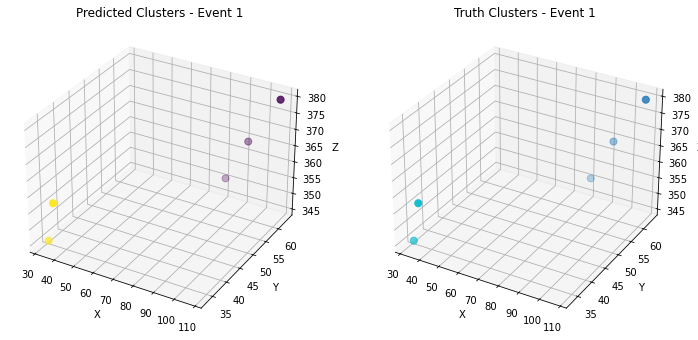

Processing Event 2/3530...


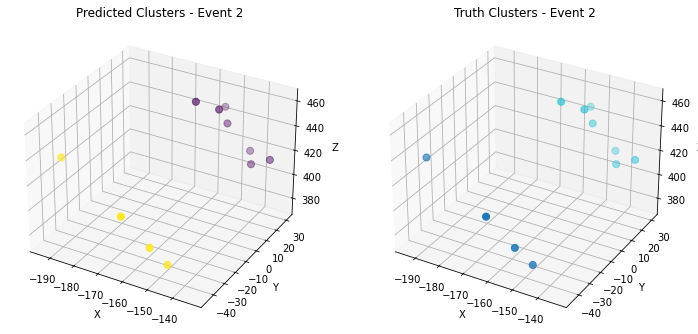

Processing Event 3/3530...


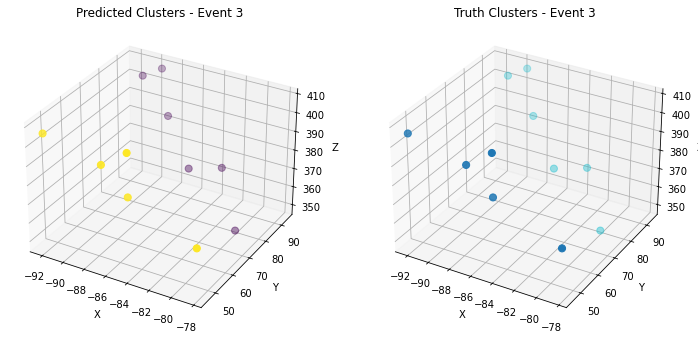

Processing Event 4/3530...


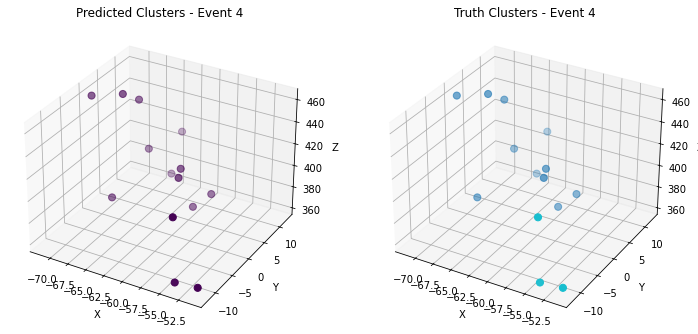

Processing Event 5/3530...


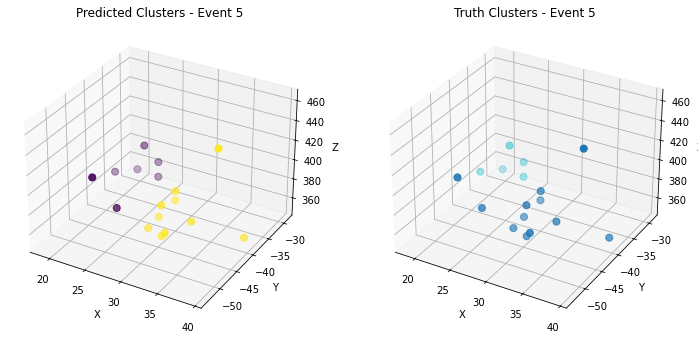

Processing Event 6/3530...


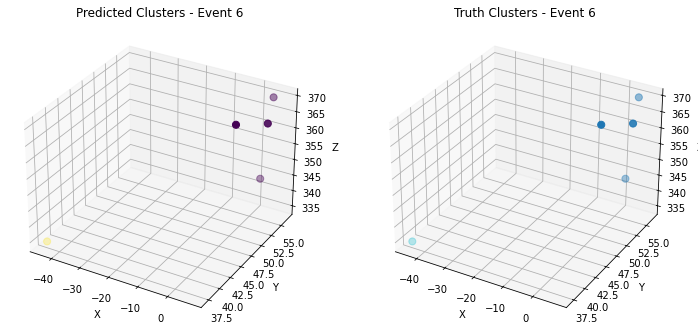

Processing Event 7/3530...


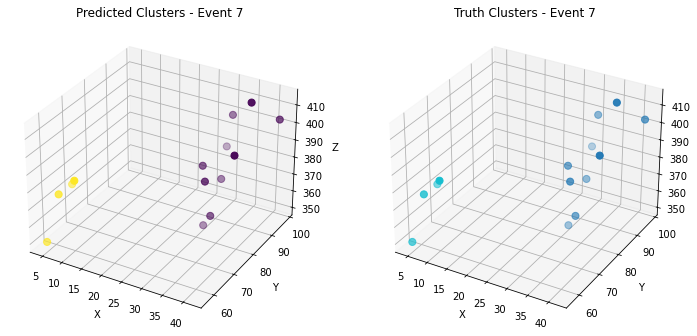

Processing Event 8/3530...


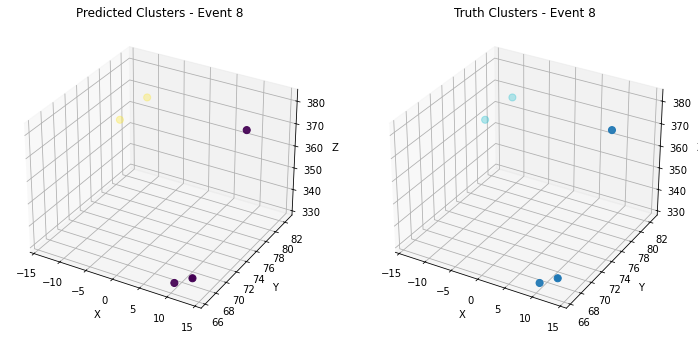

Processing Event 9/3530...


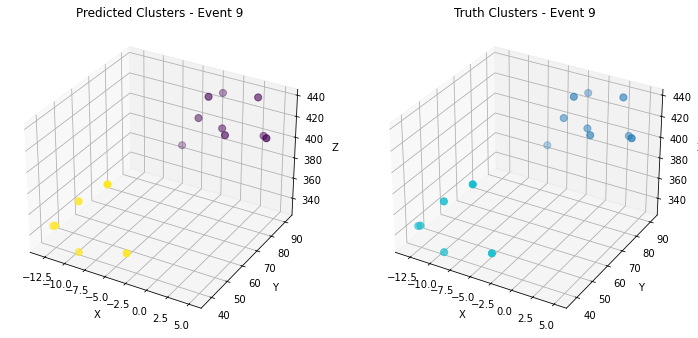

Processing Event 10/3530...


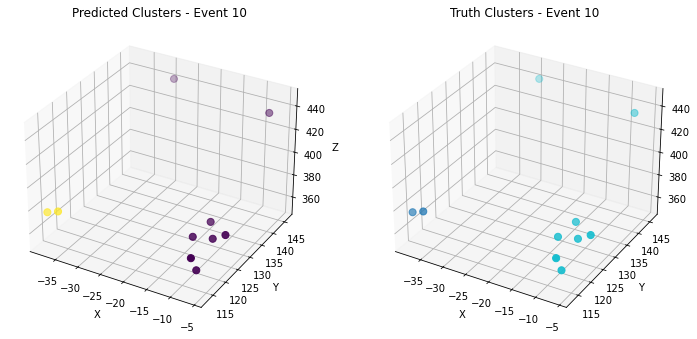

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to plot clusters
def plot_clusters(event_idx, xyz_coords, cluster_labels, truth_labels):
    fig = plt.figure(figsize=(12, 6))  # Set up the figure for side-by-side plots

    # Plot 1: Predicted clusters
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(xyz_coords[:, 0], xyz_coords[:, 1], xyz_coords[:, 2], c=cluster_labels, cmap='viridis', s=50)
    ax1.set_title(f"Predicted Clusters - Event {event_idx+1}")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # Plot 2: Truth clusters
    ax2 = fig.add_subplot(122, projection='3d')
    truth_colors = [label[0] for label in truth_labels]  # Use first entry of SimLabels as the cluster assignment
    ax2.scatter(xyz_coords[:, 0], xyz_coords[:, 1], xyz_coords[:, 2], c=truth_colors, cmap='tab10', s=50)
    ax2.set_title(f"Truth Clusters - Event {event_idx+1}")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    plt.show()

# Loop over all events
for event_idx in range(10):
    print(f"Processing Event {event_idx+1}/{len(data_test)}...")

    # Extract data
    xyz_coords = data_test[event_idx].x[:, :3]  # Get x, y, z coordinates
    cluster_labels = all_cluster_labels[event_idx]  # Predicted cluster labels
    truth_labels = data_test[event_idx].assoc  # True SimLabels

    # Convert to numpy if not already
    xyz_coords = xyz_coords.cpu().numpy() if isinstance(xyz_coords, torch.Tensor) else xyz_coords
    cluster_labels = np.array(cluster_labels)
    truth_labels = np.array(truth_labels)

    # Plot for the current event
    plot_clusters(event_idx, xyz_coords, cluster_labels, truth_labels)


# Score Calculations

In [10]:
# Initialize recon_ind as an empty list
recon_ind = []

# Loop through each event
for event_idx, labels in enumerate(all_cluster_labels):
    event_clusters = {}  # Dictionary to store clusters for this event
    
    # Loop through each cluster label and corresponding track indices
    for cluster_idx, cluster_label in enumerate(labels):
        if cluster_label not in event_clusters:
            event_clusters[cluster_label] = []
        event_clusters[cluster_label].extend(Track_ind[event_idx][cluster_idx])
    
    # Append the clusters for this event as a list
    recon_ind.append([event_clusters[label] for label in sorted(event_clusters.keys())])


In [79]:
def calculate_sim_to_reco_score(CaloParticle, energies_indices, ReconstructedTrackster):
    """
    Calculate the sim-to-reco score for a given CaloParticle and ReconstructedTrackster.
    
    Parameters:
    - CaloParticle: array of DetIds in the CaloParticle.
    - energies_indices: array of energies associated with all DetIds (indexed by DetId).
    - ReconstructedTrackster: array of DetIds in the reconstructed Trackster.
    
    Returns:
    - sim_to_reco_score: the calculated sim-to-reco score.
    """
    numerator = 0.0
    denominator = 0.0

    # Calculate total energy of the CaloParticle
    total_energy_caloparticle = sum(energies_indices[det_id] for det_id in CaloParticle)
    if total_energy_caloparticle == 0:
        return 1.0  # No energy in the CaloParticle implies perfect mismatch

    # Calculate total energy of the ReconstructedTrackster
    total_energy_trackster = sum(energies_indices[det_id] for det_id in ReconstructedTrackster)

    # Iterate over all DetIds in the CaloParticle
    for det_id in CaloParticle:
        energy_k = energies_indices[det_id]  # Energy for the current DetId in CaloParticle
        # Fraction of energy in the Trackster (fr_k^TST)
        fr_tst_k = 1 if det_id in ReconstructedTrackster else 0.0

        # Fraction of energy in the CaloParticle (fr_k^SC)
        fr_sc_k = 1

        # Update numerator using the min function
        numerator += min(
            (fr_tst_k - fr_sc_k) ** 2,  # First term in the min function
            fr_sc_k ** 2                # Second term in the min function
        ) * (energy_k ** 2)

        # Update denominator
        denominator += (fr_sc_k ** 2) * (energy_k ** 2)

    # Calculate score
    sim_to_reco_score = numerator / denominator if denominator != 0 else 1.0
    return sim_to_reco_score

def calculate_reco_to_sim_score(ReconstructedTrackster, energies_indices, CaloParticle):
    """
    Calculate the reco-to-sim score for a given ReconstructedTrackster and CaloParticle.

    Parameters:
    - ReconstructedTrackster: array of DetIds in the ReconstructedTrackster.
    - energies_indices: array of energies associated with all DetIds (indexed by DetId).
    - CaloParticle: array of DetIds in the CaloParticle.

    Returns:
    - reco_to_sim_score: the calculated reco-to-sim score.
    """
    numerator = 0.0
    denominator = 0.0

    # Calculate total energy of the ReconstructedTrackster
    total_energy_trackster = sum(energies_indices[det_id] for det_id in ReconstructedTrackster)
    if total_energy_trackster == 0:
        return 1.0  # No energy in the Trackster implies perfect mismatch

    # Calculate total energy of the CaloParticle
    total_energy_caloparticle = sum(energies_indices[det_id] for det_id in CaloParticle)

    # Iterate over all DetIds in the ReconstructedTrackster
    for det_id in ReconstructedTrackster:
        energy_k = energies_indices[det_id]  # Energy for the current DetId in the Trackster

        # Fraction of energy in the Trackster (fr_k^TST)
        fr_tst_k = 1

        # Fraction of energy in the CaloParticle (fr_k^MC)
        fr_sc_k = 1 if det_id in CaloParticle else 0.0

        # Update numerator using the min function
        numerator += min(
            (fr_tst_k - fr_sc_k) ** 2,  # First term in the min function
            fr_tst_k ** 2               # Second term in the min function
        ) * (energy_k ** 2)

        # Update denominator
        denominator += (fr_tst_k ** 2) * (energy_k ** 2)

    # Calculate score
    reco_to_sim_score = numerator / denominator if denominator != 0 else 1.0
    return reco_to_sim_score



In [80]:
import pandas as pd
import numpy as np
from tqdm import tqdm


def calculate_all_event_scores(GT_ind, energies, recon_ind, LC_x, LC_y, LC_z, LC_eta):
    """
    Calculate sim-to-reco and reco-to-sim scores for all CaloParticle and ReconstructedTrackster combinations across all events.

    Parameters:
    - GT_ind: List of CaloParticle indices for all events.
    - energies: List of energy arrays for all events.
    - recon_ind: List of ReconstructedTrackster indices for all events.
    - LC_x, LC_y, LC_z, LC_eta: Lists of x, y, z positions and eta values for all DetIds across events.

    Returns:
    - DataFrame containing scores and additional features for each CaloParticle-Trackster combination across all events.
    """
    # Initialize an empty list to store results
    all_results = []

    # Loop over all events with a progress bar
    for event_index in tqdm(range(1000), desc="Processing events"):
        caloparticles = GT_ind[event_index]  # Indices for all CaloParticles in the event
        tracksters = recon_ind[event_index]  # Indices for all ReconstructedTracksters in the event
        event_energies = energies[event_index]  # Energies for this event

        # Extract layer cluster positions and eta for this event
        event_x = np.array(LC_x[event_index])
        event_y = np.array(LC_y[event_index])
        event_z = np.array(LC_z[event_index])
        event_eta = np.array(LC_eta[event_index])

        # Compute barycenter for each CaloParticle
        cp_barycenters = []
        cp_avg_etas = []
        for caloparticle in caloparticles:
            # Compute barycenter (x, y, z)
            barycenter_x = np.mean([event_x[det_id] for det_id in caloparticle])
            barycenter_y = np.mean([event_y[det_id] for det_id in caloparticle])
            barycenter_z = np.mean([event_z[det_id] for det_id in caloparticle])
            cp_barycenters.append(np.array([barycenter_x, barycenter_y, barycenter_z]))
            
            # Compute average eta
            avg_eta = np.mean([event_eta[det_id] for det_id in caloparticle])
            cp_avg_etas.append(avg_eta)

        # Compute separation between two CaloParticles if at least two exist
        if len(cp_barycenters) >= 2:
            cp_separation = np.linalg.norm(cp_barycenters[0] - cp_barycenters[1])
        else:
            cp_separation = 0.0

        # Loop over all CaloParticles
        for calo_idx, caloparticle in enumerate(caloparticles):
            # Loop over all Tracksters
            for trackster_idx, trackster in enumerate(tracksters):
                # Calculate sim-to-reco score
                sim_to_reco_score = calculate_sim_to_reco_score(caloparticle, event_energies, trackster)
                # Calculate reco-to-sim score
                reco_to_sim_score = calculate_reco_to_sim_score(trackster, event_energies, caloparticle)

                # Calculate total energy for CaloParticle and Trackster
                cp_energy = np.sum([event_energies[det_id] for det_id in caloparticle])
                trackster_energy = np.sum([event_energies[det_id] for det_id in trackster])

                # Calculate energy difference ratio
                energy_diff_ratio = (trackster_energy - cp_energy) / cp_energy if cp_energy != 0 else None

                # Append results
                all_results.append({
                    "event_index": event_index,
                    "cp_id": calo_idx,
                    "trackster_id": trackster_idx,
                    "sim_to_reco_score": sim_to_reco_score,
                    "reco_to_sim_score": reco_to_sim_score,
                    "cp_energy": cp_energy,
                    "trackster_energy": trackster_energy,
                    "cp_avg_eta": cp_avg_etas[calo_idx],
                    "cp_separation": cp_separation,
                    "energy_diff_ratio": energy_diff_ratio
                })

    # Convert results to a DataFrame
    df = pd.DataFrame(all_results)
    return df


In [60]:

df_scores = calculate_all_event_scores(GT_ind, energies, recon_ind, LC_x, LC_y, LC_z, LC_eta)
df_CERN = calculate_all_event_scores(GT_ind, energies, MT_ind, LC_x, LC_y, LC_z, LC_eta)

Processing events:   0%|▏                                                                                                                              | 1/1000 [00:00<02:50,  5.85it/s]

188
147
169
201
158
225
236
132
254
279
282
119
247
241
278
280
133
220
276
100
200
194
251
207
253
259
270
218
231
289
295
300
264
245
190
257
203
199
293
267
306
217
223
252
269
307
266
209
301
87
173
292
146
219
283
274
296
174
244
216
192
187
171
205
297
235
224
262
198
277
186
281
222
120
256
101
263
121
250
260
2
288
193
285
206
268
305
240
230
122
291
303
176
249
226
159
208
204
242
229
284
221
102
243
149
304
286
271
261
234
233
248
86
103
157
287
255
265
272
232
275
294
189
258
239
246
298
191
273
302
134
238
237
161
202
185
1
150
178
53
164
75
148
179
135
175
162
88
20
172
160
37
170
177
38
74
63
76
163
52
3
5
9
136
7
0
188
147
169
201
158
225
236
132
254
279
282
119
247
241
278
280
133
220
276
100
200
194
251
207
253
259
270
218
231
289
295
300
264
245
190
257
203
199
293
267
306
217
223
252
269
307
266
209
301
87
173
292
146
219
283
274
296
174
244
216
192
187
171
205
297
235
224
262
198
277
186
281
222
120
256
101
263
121
250
260
2
288
193
285
206
268
305
240
230
122
291
3

Processing events:   0%|▎                                                                                                                              | 2/1000 [00:00<02:18,  7.18it/s]

186
93
61
4
130
127
195
132
118
116
67
76
111
24
70
8
13
2
53
17
6
23
48
29
12
54
37
15
27
31
39
50
19
35
25
44
41
33
21
46
10
137
154
167
124
144
212
215
134
211
206
207
150
220
148
219
151
177
200
178
133
214
203
180
169
175
172
224
192
159
135
171
179
161
218
139
141
115
174
216
163
155
126
168
143
165
147
145
72
199
170
84
140
101
176
142
208
198
193
146
164
173
158
194
156
201
152
166
157
223
213
149
138
153
181
162
182
160
136
64
59
83
100
55
51
40
28
42
3
45
11
38
34
14
47
20
30
16
7
49
36
9
18
0
26
5
22
32
1
137
154
167
124
144
212
215
134
211
206
207
150
220
148
219
151
177
200
178
133
214
203
180
169
175
172
224
192
159
135
171
179
161
218
139
141
115
174
216
163
155
126
168
143
165
147
145
72
199
170
84
140
101
176
142
208
198
193
146
164
173
158
194
156
201
152
166
157
223
213
149
138
153
181
162
182
160
136
64
59
83
100
55
51
40
28
42
3
45
11
38
34
14
47
20
30
16
7
49
36
9
18
0
26
5
22
32
1
391
347
318
284
287
253
372
551
548
459
254
395
282
558
367
345
252
398
371
392
375

Processing events:   0%|▍                                                                                                                              | 3/1000 [00:00<03:16,  5.08it/s]

150
60
74
6
392
383
81
70
134
148
52
99
123
41
109
165
303
36
386
155
411
187
450
230
33
216
302
300
247
299
335
248
358
25
265
332
354
452
297
355
333
267
472
387
483
276
515
15
488
356
331
228
456
421
337
240
273
295
269
18
339
223
236
362
146
344
229
292
480
528
271
338
485
203
307
359
129
183
238
336
249
279
310
108
154
83
237
264
290
360
179
381
462
126
352
554
260
422
242
221
531
296
133
246
473
343
105
244
379
149
270
325
37
301
162
510
251
218
388
239
417
294
530
61
274
385
410
100
504
509
482
520
489
268
563
513
166
329
349
484
533
419
86
526
262
272
549
511
529
330
178
542
184
382
457
341
243
40
326
44
226
541
91
304
561
192
404
512
348
414
527
263
217
186
43
357
448
384
363
259
28
298
291
241
82
12
481
492
376
443
455
353
420
125
94
407
408
153
389
351
350
415
506
157
308
327
342
486
87
138
49
209
309
340
364
181
458
479
475
190
447
451
361
77
220
176
487
53
189
328
57
113
261
306
409
514
78
266
406
464
174
205
227
122
222
275
152
501
158
453
418
58
210
449
412
416
110
88
17

Processing events:   1%|▊                                                                                                                              | 6/1000 [00:01<03:02,  5.45it/s]

336
190
205
221
357
236
171
271
158
258
141
356
352
295
362
335
125
267
131
257
107
15
165
350
199
395
359
390
313
342
384
351
360
365
222
353
379
374
220
393
318
394
287
343
337
297
370
291
339
348
363
373
361
372
397
371
301
385
386
369
388
354
198
381
367
338
396
334
333
305
368
383
327
349
330
50
314
389
328
358
403
142
401
329
191
197
344
364
347
229
331
268
152
117
346
123
166
264
228
391
382
380
24
204
124
251
200
299
214
196
289
298
280
282
88
157
247
75
242
319
316
300
237
179
74
296
252
312
281
270
194
321
293
243
308
311
306
278
276
292
294
263
139
266
11
279
265
130
187
100
215
304
106
22
262
248
315
140
151
261
269
195
322
8
180
4
249
206
227
250
317
231
153
186
170
244
246
230
272
89
213
245
286
57
17
216
256
188
310
232
273
33
189
277
320
309
288
178
29
90
2
336
190
205
221
357
236
171
271
158
258
141
356
352
295
362
335
125
267
131
257
107
15
165
350
199
395
359
390
313
342
384
351
360
365
222
353
379
374
220
393
318
394
287
343
337
297
370
291
339
348
363
373
361
372
3

Processing events:   1%|▉                                                                                                                              | 7/1000 [00:01<03:10,  5.21it/s]

45
59
310
403
359
424
387
375
312
305
150
414
216
420
323
369
231
378
347
380
272
261
339
297
409
433
129
343
388
39
306
436
354
417
315
241
33
187
408
191
271
370
425
331
217
194
365
180
411
319
399
265
103
273
406
386
314
190
257
377
258
296
175
98
201
36
193
405
86
345
85
67
334
383
41
351
437
267
121
30
25
423
58
292
108
407
211
358
430
9
74
382
205
213
321
263
355
200
395
401
237
260
55
394
111
396
107
66
212
16
136
299
400
199
429
22
40
159
93
422
52
99
255
75
239
336
125
381
439
421
333
18
270
65
256
342
169
328
356
340
195
254
435
352
364
379
317
416
361
192
389
427
372
53
6
77
419
240
392
178
438
134
285
332
8
117
300
398
402
198
238
397
341
360
320
304
287
80
61
95
326
37
23
31
140
268
337
311
196
17
327
35
160
101
284
50
119
181
316
42
51
330
288
44
155
120
137
170
324
73
49
269
349
242
385
393
141
82
57
10
259
156
368
112
266
24
179
313
38
147
186
154
91
146
145
60
182
185
168
96
106
79
131
113
62
48
143
63
11
81
69
15
102
153
56
105
139
3
12
183
29
78
92
135
167
47
104
19


Processing events:   1%|█                                                                                                                              | 8/1000 [00:01<03:05,  5.35it/s]

101
87
26
22
270
279
15
114
261
30
136
127
277
271
38
337
7
247
293
289
252
278
307
318
11
3
170
316
335
1
315
148
88
331
292
154
313
280
156
61
248
121
14
184
102
327
115
168
217
288
290
305
81
190
269
100
314
274
285
291
334
126
324
323
258
253
89
180
306
96
320
39
65
167
55
95
13
24
333
287
301
238
186
183
286
28
322
131
308
176
10
2
268
213
230
202
108
182
51
250
295
195
199
264
73
281
18
74
321
319
62
330
27
86
139
40
249
232
16
294
153
205
332
12
174
19
171
48
133
309
70
78
109
155
64
20
17
42
44
336
72
151
276
312
216
97
82
157
218
98
200
329
326
112
58
80
130
300
84
23
4
189
192
299
206
128
106
185
267
49
172
209
33
220
162
201
237
37
149
0
178
31
66
214
207
5
120
35
116
165
57
79
113
219
104
143
152
160
67
125
208
146
99
105
187
34
52
45
163
123
9
140
169
54
75
164
93
85
110
231
210
181
71
41
46
166
47
63
92
179
32
6
132
173
229
194
21
158
25
107
188
76
129
83
137
193
60
177
197
239
56
103
90
204
91
150
147
159
135
222
161
242
50
122
221
211
142
134
138
8
141
175
124
69
77
118

Processing events:   1%|█▏                                                                                                                             | 9/1000 [00:01<03:11,  5.17it/s]

247
322
250
272
357
295
234
287
307
274
422
221
273
356
235
313
362
233
296
371
345
343
309
290
294
320
308
373
289
374
375
253
232
402
366
319
264
300
379
350
381
283
361
226
333
377
231
236
304
337
395
225
285
414
405
255
277
334
408
401
367
244
344
424
397
249
299
217
419
254
267
252
278
418
382
385
284
223
364
389
269
316
384
387
399
369
386
413
324
383
351
271
349
339
291
425
224
218
404
312
332
256
286
251
331
314
245
390
297
310
222
398
396
380
354
330
248
365
336
246
407
266
393
352
288
263
388
317
276
348
363
358
270
392
378
303
355
360
323
400
342
409
417
306
275
346
341
328
325
298
415
411
406
338
119
391
368
394
372
370
335
410
376
347
353
292
403
421
315
205
301
302
340
416
423
359
329
326
420
327
311
318
321
305
42
12
33
239
281
52
18
73
62
282
1
6
240
242
78
105
258
93
227
127
134
170
116
43
262
126
230
213
268
280
237
24
212
279
190
165
211
265
241
243
293
215
114
125
220
228
238
257
9
229
216
209
123
50
130
91
58
219
183
110
96
14
259
197
37
149
201
124
168
159
214
92


Processing events:   1%|█▎                                                                                                                            | 10/1000 [00:01<03:12,  5.15it/s]

378
219
86
252
74
108
222
137
263
97
120
173
64
196
253
157
287
413
289
380
395
410
56
422
232
290
335
49
286
211
404
224
305
163
409
332
394
139
292
311
195
418
341
398
132
421
231
359
420
84
80
310
327
126
381
156
342
255
206
44
397
248
406
60
216
245
412
174
389
425
340
270
331
268
330
416
209
308
256
140
399
328
235
194
192
118
207
162
291
288
362
259
345
98
382
233
383
257
105
371
262
113
57
411
217
307
251
178
134
269
393
417
147
114
117
138
243
429
427
182
356
250
96
43
144
205
430
249
83
333
283
344
355
228
119
95
407
106
284
402
202
282
400
130
325
363
111
348
59
258
225
100
357
323
369
170
188
374
350
175
10
88
329
223
267
153
36
414
70
334
199
129
309
127
403
246
390
104
384
424
396
285
226
234
346
200
215
42
254
349
201
220
368
155
203
71
218
247
358
85
62
312
343
221
306
187
379
370
372
405
76
135
148
326
142
198
324
313
63
204
229
177
314
347
40
185
230
158
122
193
123
210
99
18
90
189
68
124
121
39
164
52
31
143
28
78
92
89
161
197
125
77
103
110
208
141
101
166
15
69
82

Processing events:   1%|█▍                                                                                                                            | 11/1000 [00:01<02:54,  5.67it/s]

3
72
15
103
13
65
93
12
244
183
198
175
156
179
154
185
220
182
141
204
181
221
217
140
236
274
219
157
243
267
240
176
234
238
124
218
177
199
113
197
178
80
269
268
195
161
255
205
256
196
158
139
200
186
180
257
137
155
254
5
239
201
159
184
266
194
203
222
241
138
58
288
143
237
242
94
142
202
235
19
1
38
21
79
125
244
183
198
175
156
179
154
185
220
182
141
204
181
221
217
140
236
274
219
157
243
267
240
176
234
238
124
218
177
199
113
197
178
80
269
268
195
161
255
205
256
196
158
139
200
186
180
257
137
155
254
5
239
201
159
184
266
194
203
222
241
138
58
288
143
237
242
94
142
202
235
19
1
38
21
79
125
545
53
63
75
30
42
474
94
22
113
148
130
550
536
668
197
224
180
17
578
429
546
431
252
676
572
448
551
518
382
12
483
595
482
493
350
375
412
479
277
348
554
461
328
454
487
670
415
600
103
311
276
526
522
691
480
356
74
516
481
689
31
14
593
497
354
635
500
688
525
449
544
590
392
409
453
52
460
542
35
669
82
602
380
131
517
679
503
571
589
43
547
9
172
86
231
618
452
25
205
28

Processing events:   1%|█▌                                                                                                                            | 12/1000 [00:02<03:34,  4.60it/s]

84
136
361
57
139
329
297
97
147
181
190
10
226
23
161
383
212
360
203
322
290
430
435
227
434
284
11
79
77
164
3
313
122
318
66
118
283
100
117
289
21
92
353
49
362
137
0
150
349
166
102
83
81
189
6
605
581
563
606
195
222
146
586
245
177
631
126
273
109
625
304
90
471
347
371
488
141
660
62
72
421
644
629
666
444
612
490
582
514
489
645
610
661
400
588
615
652
613
686
587
486
684
531
271
513
692
38
637
337
690
677
665
656
624
663
561
580
512
492
332
539
628
441
630
541
584
13
640
604
614
469
638
515
60
473
609
466
339
331
622
507
693
59
468
664
39
508
467
529
491
565
51
648
298
194
621
626
682
221
583
651
472
346
170
687
603
566
564
642
506
247
659
623
560
305
540
683
436
510
641
372
509
218
658
579
647
294
175
532
608
627
505
61
69
396
639
646
653
248
344
485
108
307
620
643
293
585
270
439
417
196
562
654
266
556
511
538
567
443
306
607
393
465
370
437
110
239
655
445
144
300
243
308
241
365
26
336
125
299
303
399
176
174
246
343
440
71
220
89
397
367
295
219
390
145
345
420
446
34

Processing events:   1%|█▊                                                                                                                            | 14/1000 [00:02<03:49,  4.30it/s]

423
405
433
436
450
522
415
478
509
487
469
476
431
460
490
430
510
422
454
505
418
497
511
424
367
451
437
516
393
477
467
428
517
455
480
513
503
520
448
459
468
507
394
419
456
479
417
443
491
498
449
524
406
508
512
414
486
441
485
452
492
483
521
525
409
495
380
475
466
382
523
496
427
421
481
391
502
412
442
506
504
404
470
420
434
416
438
444
432
413
484
500
462
514
501
518
446
445
494
408
461
471
447
493
429
463
465
482
464
200
125
350
217
257
144
302
110
21
13
333
423
405
433
436
450
522
415
478
509
487
469
476
431
460
490
430
510
422
454
505
418
497
511
424
367
451
437
516
393
477
467
428
517
455
480
513
503
520
448
459
468
507
394
419
456
479
417
443
491
498
449
524
406
508
512
414
486
441
485
452
492
483
521
525
409
495
380
475
466
382
523
496
427
421
481
391
502
412
442
506
504
404
470
420
434
416
438
444
432
413
484
500
462
514
501
518
446
445
494
408
461
471
447
493
429
463
465
482
464
200
125
350
217
257
144
302
110
21
13
333
76
87
47
59
103
115
33
133
24
150
15
169
387

Processing events:   2%|█▉                                                                                                                            | 15/1000 [00:02<03:25,  4.79it/s]

295
287
279
296
283
281
280
293
263
282
285
294
253
298
86
269
288
252
276
266
258
229
299
292
6
270
255
277
289
260
261
273
262
290
219
275
250
254
245
192
163
118
177
267
238
265
274
100
206
141
5
13
0
2
1
75
97
228
81
152
106
176
64
53
36
110
98
26
137
147
244
107
105
257
207
174
211
14
148
216
19
153
217
121
136
214
221
104
125
103
186
123
169
108
21
90
222
78
247
242
226
20
57
139
99
233
131
155
58
133
120
129
130
225
122
171
84
202
113
134
112
166
156
235
188
200
101
149
127
154
83
92
94
119
172
117
150
48
37
23
204
167
198
138
111
115
77
114
89
47
179
66
91
54
87
168
142
80
246
248
59
165
173
159
181
51
102
190
79
128
126
124
241
158
231
18
249
212
46
65
182
85
243
93
28
132
232
240
220
191
88
76
82
209
187
218
199
144
157
116
175
151
95
185
234
35
15
68
205
230
239
160
194
96
224
162
184
109
42
213
135
170
195
208
197
178
40
180
164
63
56
146
236
161
189
61
203
17
73
33
72
55
227
29
196
34
215
201
145
183
193
223
210
49
237
16
143
140
41
69
25
43
8
67
60
27
9
39
11
3
12
71
22
7

Processing events:   2%|██▏                                                                                                                           | 17/1000 [00:03<02:53,  5.66it/s]

168
222
158
228
189
182
208
154
239
180
207
212
232
234
152
245
177
210
242
233
175
167
225
209
198
217
184
178
197
172
204
195
165
227
218
236
183
230
216
187
202
150
214
174
196
192
235
219
221
161
211
163
226
246
243
191
201
179
200
241
213
205
176
151
166
190
215
162
148
199
193
231
220
60
203
169
185
223
240
186
125
238
237
194
155
170
20
206
157
188
146
224
229
173
171
181
164
143
147
244
159
133
160
145
149
142
153
144
156
12
30
141
121
37
53
140
129
137
138
168
222
158
228
189
182
208
154
239
180
207
212
232
234
152
245
177
210
242
233
175
167
225
209
198
217
184
178
197
172
204
195
165
227
218
236
183
230
216
187
202
150
214
174
196
192
235
219
221
161
211
163
226
246
243
191
201
179
200
241
213
205
176
151
166
190
215
162
148
199
193
231
220
60
203
169
185
223
240
186
125
238
237
194
155
170
20
206
157
188
146
224
229
173
171
181
164
143
147
244
159
133
160
145
149
142
153
144
156
12
30
141
121
37
53
140
129
137
138
200
191
240
267
153
316
270
280
326
304
244
298
345
315
265


Processing events:   2%|██▎                                                                                                                           | 18/1000 [00:03<02:36,  6.26it/s]

114
105
74
151
193
116
69
171
106
184
174
139
157
115
161
155
104
107
72
156
152
118
120
70
206
109
108
119
153
112
185
73
212
192
42
232
162
75
158
173
113
220
186
111
163
191
103
68
117
110
154
6
219
71
159
235
160
210
209
176
175
218
205
187
230
228
172
224
234
0
4
147
79
38
62
32
77
49
24
214
102
93
64
90
130
18
213
178
15
45
61
94
203
98
143
179
148
223
78
195
66
95
135
183
51
92
208
43
131
201
221
128
33
202
170
96
211
36
141
136
86
127
100
46
47
34
144
65
85
84
50
81
169
146
124
216
83
63
200
91
226
99
166
197
125
89
82
123
165
138
80
199
76
145
137
40
39
88
57
53
180
196
142
181
55
87
164
222
121
16
122
60
56
67
59
44
25
150
58
132
30
48
129
126
134
140
52
177
215
54
198
97
101
207
37
168
182
149
13
167
194
133
204
41
12
233
190
236
23
188
225
229
35
20
31
231
29
227
7
8
217
27
189
22
17
19
28
14
10
21
26
3
9
11
2
5
1
147
79
38
62
32
77
49
24
214
102
93
64
90
130
18
213
178
15
45
61
94
203
98
143
179
148
223
78
195
66
95
135
183
51
92
208
43
131
201
221
128
33
202
170
96
211
36

Processing events:   2%|██▍                                                                                                                           | 19/1000 [00:03<02:40,  6.10it/s]

6
45
4
41
33
46
55
36
14
21
49
13
39
18
10
38
7
65
11
30
67
8
258
232
285
307
206
204
259
86
177
332
233
311
330
260
347
334
308
288
234
229
257
230
284
151
310
261
331
309
231
283
335
333
312
346
286
306
48
256
287
32
1
258
232
285
307
206
204
259
86
177
332
233
311
330
260
347
334
308
288
234
229
257
230
284
151
310
261
331
309
231
283
335
333
312
346
286
306
48
256
287
32
1
132
107
88
194
177
439
217
153
265
71
241
306
56
286
267
434
244
131
41
450
410
327
266
343
331
304
324
412
264
109
414
445
287
239
218
155
23
111
134
176
189
366
57
196
243
396
309
284
423
364
238
195
365
213
455
342
443
283
349
170
449
347
395
413
420
25
291
30
175
303
339
424
154
55
285
193
32
398
86
415
437
281
328
444
58
236
178
215
345
383
72
411
451
33
446
344
454
394
422
362
402
399
359
188
433
73
191
212
432
400
403
278
89
179
263
172
330
442
332
211
187
108
280
401
42
262
333
379
358
348
302
312
216
308
53
199
200
18
393
361
76
370
197
133
222
310
305
341
135
54
268
192
240
397
219
180
326
360
96
351
31

Processing events:   2%|██▌                                                                                                                           | 20/1000 [00:03<03:00,  5.44it/s]

67
52
84
124
102
38
145
167
416
184
421
29
431
207
425
230
405
16
429
20
406
426
90
3
17
0
251
254
296
427
377
271
19
260
409
336
428
9
436
272
417
419
248
388
78
232
122
371
440
404
452
229
270
407
435
418
321
138
392
393
295
318
182
36
121
441
430
447
373
293
438
294
49
15
389
83
353
168
252
375
51
408
47
171
255
314
95
274
22
151
92
165
387
46
4
204
185
74
224
114
80
158
82
123
249
227
117
250
62
208
233
337
164
372
202
50
65
5
181
91
28
319
166
85
137
169
34
277
246
390
299
163
315
316
297
118
120
79
275
105
116
183
279
149
258
113
66
338
61
99
10
253
146
27
119
453
26
45
98
64
35
44
201
354
355
391
206
259
300
43
141
69
448
101
68
142
225
247
14
162
257
93
125
48
39
205
273
226
115
317
186
100
323
340
228
234
235
77
161
144
269
60
75
322
352
94
140
106
63
143
160
148
21
210
301
59
231
261
335
112
139
203
13
81
159
320
357
103
8
1
104
276
40
97
37
147
356
374
150
209
256
376
126
129
298
399
367
413
333
417
418
39
420
45
68
57
30
83
299
325
122
199
329
24
137
334
96
180
16
3
202
311

Processing events:   2%|██▋                                                                                                                           | 21/1000 [00:03<03:03,  5.32it/s]

217
232
205
250
386
190
307
289
304
270
340
360
303
288
306
324
373
308
375
341
233
320
322
0
393
291
287
249
313
323
321
218
305
319
292
267
318
252
290
184
326
251
231
192
207
206
135
286
187
186
268
189
219
188
377
269
265
2
150
264
266
253
271
248
185
29
220
191
1
23
95
217
232
205
250
386
190
307
289
304
270
340
360
303
288
306
324
373
308
375
341
233
320
322
0
393
291
287
249
313
323
321
218
305
319
292
267
318
252
290
184
326
251
231
192
207
206
135
286
187
186
268
189
219
188
377
269
265
2
150
264
266
253
271
248
185
29
220
191
1
23
95
111
144
189
82
148
150
163
94
110
108
132
114
149
59
83
201
93
98
112
181
115
191
208
147
174
139
131
100
109
130
205
129
151
90
84
193
119
118
140
200
186
116
178
207
97
204
137
168
169
113
188
175
156
153
192
5
143
162
74
20
15
1
6
2
3
51
64
88
99
75
76
124
42
33
56
8
70
51
37
161
67
61
79
72
68
46
106
77
45
197
154
202
176
78
62
184
142
138
159
173
101
133
66
146
89
206
128
123
120
44
125
85
50
80
190
31
163
136
81
158
198
117
12
26
92
194
121

Processing events:   2%|██▉                                                                                                                           | 23/1000 [00:04<02:44,  5.95it/s]

354
355
311
324
315
357
364
124
287
374
316
73
272
201
122
313
335
49
271
323
56
298
263
305
246
359
249
193
319
64
141
53
170
322
356
334
176
336
310
209
279
299
269
308
108
24
330
142
261
140
329
373
320
283
376
47
190
213
248
91
67
358
301
130
217
18
372
352
227
369
273
109
182
368
87
353
252
346
367
172
101
27
205
348
66
349
129
179
274
267
236
370
59
178
152
143
195
363
114
365
194
115
362
350
371
54
183
4
180
360
79
207
120
77
30
270
224
200
147
26
154
199
230
237
181
218
191
105
102
136
110
134
256
144
107
253
234
82
123
150
229
153
189
103
242
239
216
220
235
255
204
231
83
32
34
81
52
366
113
165
188
184
258
210
12
223
169
1
250
149
117
38
251
226
86
72
118
37
173
214
111
160
125
206
99
46
119
96
94
22
127
241
131
145
58
90
167
85
35
247
203
6
163
161
97
40
19
259
238
65
244
164
221
41
44
42
139
116
159
228
106
135
254
257
187
70
132
168
208
43
93
92
16
13
151
196
63
95
29
222
186
76
7
50
55
69
100
23
78
20
10
138
104
295
80
89
121
48
68
317
361
39
157
177
57
333
60
351
321
17

Processing events:   2%|███                                                                                                                           | 24/1000 [00:04<02:54,  5.59it/s]

110
120
256
137
91
155
175
79
66
412
448
191
218
250
44
55
330
465
405
32
282
394
311
455
378
279
414
468
276
319
283
201
377
309
323
460
404
349
424
310
433
267
454
417
379
365
329
30
253
430
67
442
445
463
284
315
280
168
450
409
367
278
422
441
206
25
268
305
327
308
117
432
297
449
115
249
134
211
381
165
407
411
406
74
89
68
396
341
194
222
186
335
354
63
362
467
452
130
348
317
101
316
466
418
247
107
453
440
217
136
446
399
421
458
242
384
392
77
174
161
294
351
361
408
457
35
435
373
296
416
400
387
369
240
221
328
306
274
275
322
390
131
461
451
444
366
334
273
90
15
281
37
439
459
462
359
443
370
172
215
116
189
325
376
238
257
357
342
169
428
393
371
318
255
434
456
427
352
429
336
385
389
265
346
160
50
223
383
391
353
403
304
431
321
363
464
227
447
314
332
244
436
386
425
426
345
324
3
271
243
410
402
312
251
380
347
438
178
333
423
237
105
307
331
382
375
388
185
320
295
374
10
248
313
360
419
437
420
133
76
343
368
192
415
356
123
158
241
272
266
401
326
364
152
285
100

Processing events:   3%|███▎                                                                                                                          | 26/1000 [00:04<02:32,  6.37it/s]

122
157
224
59
433
93
46
180
94
113
301
110
423
262
213
260
115
391
47
223
172
62
92
68
430
30
162
80
88
84
305
61
49
450
66
85
347
118
185
342
154
280
252
215
390
369
337
221
226
422
371
41
161
297
308
436
368
214
338
95
100
87
233
323
33
158
40
91
256
178
304
263
225
343
443
255
306
60
429
388
441
303
426
389
421
67
152
11
270
259
432
153
268
334
413
331
114
119
211
333
35
332
97
299
219
235
182
142
149
330
236
251
274
51
174
365
386
227
279
375
273
275
190
277
376
147
329
300
447
438
140
392
231
439
220
292
36
444
452
440
427
431
184
267
37
89
425
397
398
189
146
307
134
364
419
230
328
309
121
175
298
453
271
261
173
79
160
65
446
434
124
293
339
139
229
237
449
217
50
112
159
222
181
176
344
96
372
39
209
378
340
374
428
228
258
384
210
82
296
442
266
424
123
45
367
111
406
451
435
377
86
83
253
345
43
212
295
234
361
362
81
265
120
138
98
363
148
48
150
216
269
58
341
143
257
360
409
387
324
179
359
385
188
232
177
187
370
117
99
264
327
336
335
379
325
448
437
366
420
125
155
25

Processing events:   3%|███▍                                                                                                                          | 27/1000 [00:05<03:11,  5.07it/s]

366
365
371
415
422
363
408
390
381
383
419
399
428
389
391
431
418
416
367
376
417
402
425
404
401
436
426
377
412
368
397
424
437
393
429
407
403
398
413
430
427
374
370
410
396
387
379
287
421
438
178
245
414
411
392
405
433
395
439
394
380
420
384
432
406
423
136
216
409
375
364
388
382
281
400
440
378
372
373
198
204
233
260
369
288
83
124
168
48
14
57
167
18
7
75
189
103
56
11
40
149
64
32
91
187
115
1
23
150
4
84
6
2
178
193
124
107
137
91
158
395
70
296
222
270
379
393
65
392
202
349
314
341
342
294
176
268
221
194
142
235
192
232
315
262
188
344
381
241
220
195
62
353
295
334
289
128
280
356
93
156
391
337
272
355
377
249
171
264
354
297
339
313
207
364
242
219
236
282
331
319
123
53
271
336
290
214
365
328
320
186
372
172
218
389
203
190
366
191
293
308
332
239
196
299
291
187
182
324
269
273
204
174
298
321
125
374
343
244
382
180
126
307
318
371
27
210
333
237
378
189
305
43
350
245
167
217
357
103
177
223
288
86
154
150
330
49
216
120
104
149
168
281
380
335
248
285
106
34

Processing events:   3%|███▌                                                                                                                          | 28/1000 [00:05<03:24,  4.76it/s]

257
208
226
283
286
383
390
229
256
278
302
258
386
252
394
253
348
233
206
228
284
304
397
224
209
387
259
260
9
261
347
234
277
306
36
345
323
396
255
225
303
322
183
227
325
388
231
96
165
29
185
41
1
132
77
59
5
166
60
25
66
16
17
113
11
47
22
7
148
13
20
32
3
257
208
226
283
286
383
390
229
256
278
302
258
386
252
394
253
348
233
206
228
284
304
397
224
209
387
259
260
9
261
347
234
277
306
36
345
323
396
255
225
303
322
183
227
325
388
231
96
165
29
185
41
1
132
77
59
5
166
60
25
66
16
17
113
11
47
22
7
148
13
20
32
3
5
8
3
19
4
15
7
10
26
2
6
21
25
12
17
14
11
9
1
13
0
23
16
18
20
22
24
61
45
12
25
53
35
62
174
80
70
7
177
28
157
4
183
115
21
182
186
189
1
173
171
97
179
216
100
178
44
71
81
108
91
163
19
195
180
217
94
47
78
0
99
89
188
105
18
88
215
83
27
29
143
168
162
79
187
102
33
136
50
13
98
26
153
64
82
52
51
116
107
119
48
146
46
58
125
8
56
93
90
156
151
41
176
160
106
31
34
133
103
104
69
154
109
147
142
132
23
43
85
38
24
92
36
145
73
68
17
117
150
149
76
130
139
114

Processing events:   3%|███▉                                                                                                                          | 31/1000 [00:05<02:33,  6.33it/s]

192
198
247
209
233
185
196
219
211
327
311
267
330
331
238
307
218
332
270
194
329
287
286
248
236
324
243
308
321
325
200
284
225
197
263
246
299
259
312
288
309
229
254
320
199
283
237
250
294
222
249
190
204
251
231
297
300
221
301
328
226
305
295
191
318
315
296
261
255
298
214
252
313
228
275
208
241
205
279
184
333
258
289
234
282
202
193
290
317
304
201
326
266
292
240
227
303
291
232
316
265
281
213
206
212
242
310
293
175
302
277
207
319
314
230
223
257
322
278
224
273
280
276
245
210
285
253
260
269
181
323
306
244
220
274
262
239
203
264
271
256
235
268
272
172
6
155
167
84
66
122
164
30
159
144
161
40
10
152
60
137
169
49
75
96
128
2
16
238
240
263
239
231
241
242
243
234
272
237
245
247
201
268
265
235
270
224
232
236
273
230
249
246
275
264
229
269
42
267
271
248
244
228
221
262
274
223
151
205
233
211
215
219
208
28
12
109
118
238
240
263
239
231
241
242
243
234
272
237
245
247
201
268
265
235
270
224
232
236
273
230
249
246
275
264
229
269
42
267
271
248
244
228
221
26

Processing events:   3%|████                                                                                                                          | 32/1000 [00:06<03:30,  4.59it/s]

403
430
345
374
316
771
473
621
295
278
560
720
520
472
710
712
643
642
466
268
588
523
431
730
521
636
563
694
477
605
617
802
558
548
619
573
762
527
568
459
772
784
258
729
657
602
550
670
529
561
779
666
554
480
662
683
404
807
502
601
427
421
681
786
668
599
556
511
432
806
744
690
238
210
543
652
677
597
344
698
562
519
484
641
586
661
675
428
585
593
741
751
660
726
567
237
555
564
759
426
600
557
516
575
723
545
750
627
406
633
644
526
794
400
598
685
697
371
375
646
524
746
727
483
522
764
92
479
566
676
546
782
399
518
732
604
463
706
760
693
482
276
792
553
154
711
391
639
542
396
797
587
401
707
678
436
525
595
638
397
788
787
767
438
456
434
457
347
695
671
220
405
724
757
665
713
703
606
622
618
441
486
571
517
739
440
208
773
734
793
778
470
398
616
718
679
780
774
615
437
748
565
552
635
667
682
433
559
680
702
346
189
240
424
800
790
475
576
392
768
765
318
572
549
474
721
547
221
476
465
640
155
343
796
785
647
737
458
569
259
423
766
645
607
708
804
781
544
620
471
7

Processing events:   3%|████▏                                                                                                                         | 33/1000 [00:06<03:35,  4.49it/s]

319
225
207
307
248
199
336
267
393
274
185
399
247
353
229
187
334
368
189
295
401
288
230
374
275
365
293
198
222
408
320
403
337
309
258
190
226
361
232
388
349
223
218
192
351
385
417
415
243
394
252
362
213
317
330
276
289
265
285
313
255
355
373
300
205
303
256
392
314
407
339
194
215
397
345
251
312
231
406
414
358
268
347
363
219
352
327
249
241
416
412
411
324
299
359
326
287
193
263
302
281
306
391
301
338
180
264
261
239
350
380
382
244
216
400
214
360
305
384
390
383
372
188
242
228
341
405
398
376
284
278
335
364
116
370
316
135
240
272
291
238
329
318
209
308
298
260
410
321
387
269
354
378
290
250
196
210
237
402
389
325
224
292
282
342
277
206
375
220
246
340
344
279
201
186
200
227
331
346
202
369
211
366
357
379
208
283
310
273
356
191
404
381
150
343
315
280
304
409
413
395
396
221
297
270
328
377
367
322
197
371
266
348
332
294
386
217
259
179
323
286
245
262
254
253
203
311
333
1
35
161
169
151
102
2
5
17
0
134
115
69
52
88
171
22
101
170
31
79
61
83
97
67
75
111
1

Processing events:   3%|████▎                                                                                                                         | 34/1000 [00:06<04:05,  3.93it/s]

249
219
367
278
294
283
345
232
299
326
307
344
236
296
308
140
285
323
328
332
234
227
260
324
223
368
274
198
239
284
302
233
312
231
156
313
304
279
329
330
346
40
262
347
238
254
251
305
301
297
255
248
214
261
256
383
298
303
272
423
217
295
252
253
27
325
362
216
139
4
406
8
158
144
5
185
160
174
189
188
157
118
201
41
0
187
11
159
129
22
91
33
102
9
65
18
15
10
81
3
228
215
243
246
200
310
281
186
218
173
331
276
202
259
235
275
282
311
280
172
220
229
250
247
363
237
12
273
348
306
341
309
271
300
277
141
257
321
199
230
258
82
249
219
367
278
294
283
345
232
299
326
307
344
236
296
308
140
285
323
328
332
234
227
260
324
223
368
274
198
239
284
302
233
312
231
156
313
304
279
329
330
346
40
262
347
238
254
251
305
301
297
255
248
214
261
256
383
298
303
272
423
217
295
252
253
27
325
362
216
139
4
406
8
158
144
5
185
160
174
189
188
157
118
201
41
0
187
11
159
129
22
91
33
102
9
65
18
15
10
81
3
74
46
60
465
338
91
34
199
133
109
23
668
477
453
155
586
172
587
314
16
432
584
4

Processing events:   4%|████▍                                                                                                                         | 35/1000 [00:07<04:54,  3.28it/s]

520
558
202
591
217
554
564
180
484
257
654
237
302
487
324
280
329
141
350
518
304
370
579
397
540
162
400
118
662
572
682
619
614
553
560
504
570
592
476
565
561
530
537
675
485
661
531
550
575
444
545
97
563
552
573
551
505
524
461
642
422
604
481
574
603
638
437
632
442
678
641
517
181
503
593
507
366
617
119
555
620
483
527
672
650
648
616
200
613
651
605
544
486
482
510
653
665
674
611
480
462
622
567
425
522
441
542
576
502
501
539
328
667
598
666
623
143
677
523
577
680
594
643
624
671
519
606
369
568
547
509
569
597
610
636
679
625
529
371
506
528
546
681
395
526
621
612
548
571
664
601
599
640
673
120
626
161
278
578
600
663
635
566
460
330
398
117
649
549
234
305
581
525
652
521
590
633
368
259
602
508
580
543
618
100
615
562
282
595
639
631
146
303
325
218
235
424
219
348
164
300
279
79
463
145
420
142
301
346
176
349
179
99
50
327
258
51
216
396
399
423
163
443
326
281
367
182
238
2
65
215
277
98
64
236
183
101
117
80
145
65
233
39
52
298
167
286
204
188
259
33
348
42
397


Processing events:   4%|████▌                                                                                                                         | 36/1000 [00:07<04:38,  3.46it/s]

290
198
209
251
217
195
252
85
325
155
129
403
157
218
174
180
246
321
275
375
344
221
427
359
216
104
370
173
368
377
318
273
90
324
194
372
322
125
341
340
215
270
416
420
131
301
70
421
219
371
374
423
361
247
248
303
342
254
396
277
323
406
175
424
343
127
213
426
212
272
405
126
210
404
171
358
253
407
214
355
123
369
367
278
87
373
197
356
302
408
250
274
319
121
271
86
151
429
196
276
249
211
282
428
386
376
320
122
345
357
72
425
154
153
378
419
385
414
193
379
395
394
387
417
388
124
409
89
150
172
152
422
179
229
45
389
71
156
91
6
103
128
0
105
46
88
130
109
57
49
1
290
198
209
251
217
195
252
85
325
155
129
403
157
218
174
180
246
321
275
375
344
221
427
359
216
104
370
173
368
377
318
273
90
324
194
372
322
125
341
340
215
270
416
420
131
301
70
421
219
371
374
423
361
247
248
303
342
254
396
277
323
406
175
424
343
127
213
426
212
272
405
126
210
404
171
358
253
407
214
355
123
369
367
278
87
373
197
356
302
408
250
274
319
121
271
86
151
429
196
276
249
211
282
428
386
3

Processing events:   4%|████▋                                                                                                                         | 37/1000 [00:07<04:41,  3.42it/s]


33
363
250
279
101
376
30
252
82
1
120
305
199
47
77
102
358
40
113
359
68
49
283
2
198
257
298
256
65
32
143
218
222
160
318
79
342
117
0
360
234
169
103
8
43
64
13
96
181
280
67
217
236
20
197
50
34
46
177
175
29
384
23
485
431
402
189
25
38
152
407
137
243
110
55
383
309
418
210
226
406
167
208
416
72
168
372
73
269
211
311
36
246
329
227
294
151
136
391
405
270
122
369
85
471
125
380
271
88
59
225
455
26
228
188
249
324
86
185
10
403
315
388
111
332
244
54
39
312
354
295
272
328
291
127
288
134
346
350
89
91
371
368
310
90
92
148
183
404
349
145
292
74
331
290
264
121
275
330
58
6
28
93
53
245
104
325
164
267
147
165
124
289
347
287
247
106
317
366
316
213
297
278
123
442
35
308
229
212
166
351
230
186
146
5
345
112
21
248
52
94
56
16
385
138
105
109
22
206
107
207
352
386
209
163
190
87
240
327
389
17
268
382
57
37
108
276
15
314
367
326
333
353
241
344
51
205
75
71
242
149
187
293
266
348
24
224
95
387
126
27
370
133
182
184
150
274
135
223
390
277
384
23
485
431
402
189
25
38
1

Processing events:   4%|████▊                                                                                                                         | 38/1000 [00:08<05:24,  2.97it/s]

259
205
295
182
325
491
461
279
432
501
459
495
408
480
329
512
366
160
142
369
260
475
460
401
395
476
294
246
36
410
467
373
468
215
390
474
372
488
515
483
339
320
322
251
518
278
486
415
334
337
507
183
487
469
218
376
280
418
287
443
371
253
313
298
323
162
336
207
375
377
430
517
458
299
214
293
482
277
188
318
330
211
509
505
291
485
210
257
466
497
510
144
394
500
370
250
332
321
441
379
484
255
187
315
283
419
217
256
180
442
328
296
514
445
314
284
368
396
252
118
359
516
181
247
317
407
470
414
380
481
216
212
262
340
282
451
243
290
429
440
504
506
285
143
492
511
392
189
362
157
292
324
412
374
357
244
335
122
498
494
508
393
424
338
367
400
209
454
397
453
502
499
496
513
413
185
213
12
333
444
409
450
477
156
286
360
164
472
98
417
364
452
503
331
190
363
398
457
206
473
327
493
489
462
141
426
358
478
479
119
465
464
288
416
402
389
490
258
297
471
204
261
289
319
254
248
77
316
361
391
428
281
446
365
245
378
399
455
219
186
46
249
425
326
411
159
208
120
427
88
57
184

Processing events:   4%|████▉                                                                                                                         | 39/1000 [00:08<04:53,  3.27it/s]

5
0
15
57
32
10
100
56
133
33
95
25
19
16
1
11
7
112
148
174
210
199
39
125
103
256
230
82
49
274
296
157
317
195
59
71
228
213
302
196
211
263
147
175
162
138
252
205
201
234
332
280
13
232
121
47
172
300
255
159
301
189
206
188
229
176
194
35
291
266
292
202
190
258
270
308
250
282
179
333
290
233
156
273
160
304
170
248
150
324
105
155
235
253
215
64
113
299
219
321
310
42
293
197
237
218
259
298
48
171
264
151
212
281
40
214
127
311
285
149
331
254
318
63
295
200
207
269
84
345
340
128
217
236
334
106
61
272
27
216
284
305
227
343
297
279
22
173
289
60
294
275
158
261
209
93
198
315
231
247
109
338
260
330
312
267
108
283
316
325
120
249
208
79
271
265
123
154
152
191
309
339
130
251
257
23
192
268
203
161
136
204
110
193
262
153
17
97
320
53
286
80
126
38
86
238
326
342
135
131
102
134
30
122
92
114
329
70
85
111
65
132
101
28
107
337
66
327
62
83
72
26
18
137
341
43
146
344
52
29
4
78
88
335
21
124
12
115
91
50
8
37
328
87
14
41
51
68
81
104
2
116
129
69
36
3
90
9
67
148
174
210


Processing events:   4%|█████                                                                                                                         | 40/1000 [00:08<04:24,  3.63it/s]

208
284
66
228
27
77
49
55
307
241
293
227
42
255
138
223
247
79
246
92
17
118
40
32
160
133
96
221
61
269
257
253
399
116
260
209
54
161
202
155
94
290
291
4
308
256
303
97
274
204
248
156
271
273
242
310
294
179
278
95
235
111
261
236
251
237
224
272
153
311
21
139
39
135
183
292
117
226
301
265
68
280
84
231
268
63
300
154
121
285
244
250
41
112
119
232
219
254
249
78
245
262
299
240
267
279
115
80
233
239
259
302
282
309
275
33
210
110
283
270
220
238
225
152
113
62
53
258
276
44
65
57
141
263
230
277
162
185
25
165
56
266
109
47
243
48
222
186
197
90
16
74
177
174
178
229
158
163
182
108
75
76
140
51
81
206
22
175
187
120
67
98
46
31
199
82
181
157
83
114
91
142
3
64
37
35
200
26
93
19
203
176
180
198
10
43
166
205
151
14
34
207
20
1
99
8
184
132
136
18
36
9
24
52
134
85
137
6
12
201
159
38
164
23
324
318
332
349
331
107
373
131
379
382
72
345
59
252
328
360
88
341
330
359
289
50
314
89
348
335
356
381
396
367
103
129
286
296
106
372
150
363
295
147
361
350
45
380
371
281
368
389


Processing events:   4%|█████▏                                                                                                                        | 41/1000 [00:08<04:29,  3.56it/s]

17
479
413
507
506
466
476
424
441
386
510
395
319
148
456
29
267
223
347
514
494
511
146
477
396
262
509
518
127
240
516
218
458
517
83
322
412
344
392
99
389
455
478
43
78
58
508
492
174
60
26
505
291
512
25
488
440
427
369
239
265
393
38
288
40
293
428
166
487
493
221
329
489
475
216
500
63
372
165
14
124
349
426
501
59
122
485
504
294
398
121
467
326
16
27
502
37
295
45
321
266
443
77
394
289
374
47
98
215
263
169
371
368
241
42
346
170
217
151
64
324
195
12
194
1
175
171
219
320
167
348
44
76
152
345
270
120
350
149
101
220
11
18
100
297
264
28
41
80
261
0
373
145
197
323
4
352
62
128
61
3
172
328
176
177
48
495
118
139
163
208
187
96
70
419
233
186
435
51
254
278
34
465
313
450
20
497
420
404
400
418
429
252
415
444
474
383
409
339
13
431
268
399
434
86
250
111
411
50
338
355
472
361
36
381
446
246
408
449
480
401
388
276
453
71
95
482
438
498
432
459
417
272
384
481
416
464
227
407
116
461
247
340
203
54
513
162
447
410
423
362
55
402
310
385
235
436
202
403
382
406
471
304
376


Processing events:   4%|█████▎                                                                                                                        | 42/1000 [00:09<04:18,  3.71it/s]

296
316
270
335
347
300
338
336
339
368
299
315
340
341
313
297
311
263
310
332
293
298
301
327
337
295
294
346
334
333
314
278
206
296
316
270
335
347
300
338
336
339
368
299
315
340
341
313
297
311
263
310
332
293
298
301
327
337
295
294
346
334
333
314
278
206
123
64
75
158
104
36
90
53
245
237
194
177
140
26
305
212
286
15
246
223
382
7
374
136
261
215
54
287
276
11
331
122
355
260
423
379
389
422
404
303
371
63
259
132
292
236
412
288
405
265
289
326
387
369
306
258
176
251
277
396
213
181
406
304
279
354
239
96
361
384
157
420
88
312
174
320
267
323
91
4
377
100
248
244
414
264
330
376
309
269
21
421
321
230
367
284
403
211
74
247
81
133
383
280
182
249
59
381
98
372
273
386
165
365
262
329
328
266
272
380
392
32
195
317
388
322
252
9
408
319
138
143
283
324
243
187
192
137
171
291
410
275
307
274
242
302
281
61
78
345
407
97
362
360
253
200
232
397
155
342
8
250
210
79
233
109
391
268
173
199
178
102
225
282
271
411
390
285
224
357
318
235
255
398
126
48
241
290
101
417
234
65
1

Processing events:   4%|█████▍                                                                                                                        | 43/1000 [00:09<04:08,  3.85it/s]

65
58
204
49
79
171
231
45
93
192
194
304
105
40
134
173
255
317
25
257
37
172
147
170
150
283
308
169
227
116
141
74
196
334
332
202
89
316
335
232
195
290
148
309
306
258
197
152
168
233
198
280
78
131
193
321
303
149
310
336
282
136
262
243
292
305
166
76
175
289
363
315
41
338
146
331
157
274
153
60
135
320
226
199
201
132
267
83
245
27
137
119
287
314
284
167
228
318
191
48
207
92
206
408
277
229
203
253
230
38
151
129
64
63
362
51
379
107
311
115
62
44
97
154
122
90
176
52
264
200
361
225
18
281
349
84
108
174
57
59
110
121
312
113
333
337
330
138
319
278
234
259
265
286
307
139
114
205
288
133
117
279
120
98
43
266
91
256
260
285
189
263
75
261
364
130
313
291
20
73
77
69
34
47
30
102
81
82
95
124
123
235
14
67
35
56
104
88
68
7
12
94
109
96
36
66
106
55
29
16
50
125
118
5
103
85
101
31
80
11
23
9
15
126
26
54
21
65
58
204
49
79
171
231
45
93
192
194
304
105
40
134
173
255
317
25
257
37
172
147
170
150
283
308
169
227
116
141
74
196
334
332
202
89
316
335
232
195
290
148
309
306

Processing events:   4%|█████▌                                                                                                                        | 44/1000 [00:09<04:28,  3.56it/s]

183
162
399
345
216
358
144
182
272
213
413
354
329
407
403
344
359
128
243
295
343
372
179
360
402
324
242
209
212
366
392
270
341
325
375
369
371
351
214
165
180
400
385
190
161
208
159
346
348
244
163
398
246
393
347
327
224
240
415
238
236
185
302
156
293
217
367
404
381
388
383
380
251
389
247
394
409
252
382
365
158
401
357
411
275
299
340
391
276
100
221
248
140
326
373
186
184
378
254
352
296
342
249
223
395
412
99
297
127
294
235
164
239
410
328
384
356
301
300
143
396
406
111
142
273
215
178
368
177
376
355
271
414
220
210
268
377
211
387
298
405
188
386
219
370
245
181
222
323
322
390
397
269
241
87
350
218
339
374
250
187
72
353
145
160
155
237
70
46
2
22
10
17
28
71
42
33
112
61
19
39
8
53
86
3
0
24
4
1
13
6
32
183
162
399
345
216
358
144
182
272
213
413
354
329
407
403
344
359
128
243
295
343
372
179
360
402
324
242
209
212
366
392
270
341
325
375
369
371
351
214
165
180
400
385
190
161
208
159
346
348
244
163
398
246
393
347
327
224
240
415
238
236
185
302
156
293
217
36

Processing events:   4%|█████▋                                                                                                                        | 45/1000 [00:09<04:12,  3.78it/s]

290
41
27
36
52
61
439
83
18
68
11
30
364
2
327
362
6
21
105
440
114
92
141
415
428
387
388
143
424
444
438
145
426
29
35
355
325
58
413
70
352
118
47
353
425
414
7
326
368
427
25
292
436
332
445
329
335
395
267
448
91
64
443
330
104
67
365
419
78
112
28
385
173
54
175
128
450
367
446
155
291
42
334
142
189
80
8
62
13
451
447
331
328
135
366
38
384
416
360
386
410
433
123
397
133
37
24
23
363
356
354
295
333
86
390
453
40
96
48
412
49
441
359
121
409
193
82
15
63
88
392
408
17
389
432
249
93
294
205
134
50
361
435
89
10
268
223
81
442
357
393
411
51
3
358
97
90
116
270
391
269
434
206
394
43
71
74
113
119
130
158
85
129
44
73
144
120
16
56
157
107
84
94
95
59
19
79
250
106
72
60
53
156
26
77
190
224
122
140
34
111
57
131
69
132
115
20
5
192
174
33
207
191
208
45
251
12
98
209
226
290
41
27
36
52
61
439
83
18
68
11
30
364
2
327
362
6
21
105
440
114
92
141
415
428
387
388
143
424
444
438
145
426
29
35
355
325
58
413
70
352
118
47
353
425
414
7
326
368
427
25
292
436
332
445
329
335
395
2

Processing events:   5%|█████▉                                                                                                                        | 47/1000 [00:10<03:28,  4.58it/s]

598
47
38
606
651
640
6
61
25
15
77
363
93
115
728
538
616
176
136
529
539
395
671
644
327
155
670
628
597
661
276
1
625
300
638
713
637
560
656
205
227
734
568
688
455
650
565
717
70
422
341
673
324
612
700
257
509
664
534
609
634
610
80
480
615
254
639
420
659
710
608
559
711
596
592
135
690
722
571
331
562
706
557
657
709
323
570
585
662
387
189
182
626
226
689
530
112
225
153
729
737
672
588
299
417
665
423
566
714
718
37
753
563
730
41
558
594
676
727
704
575
752
703
607
660
715
446
146
611
647
572
131
701
123
418
364
40
145
170
504
663
537
675
95
712
359
655
648
591
396
533
735
564
178
329
390
161
90
561
213
658
725
8
573
416
199
236
731
216
184
719
693
63
627
421
304
642
636
540
456
604
65
646
641
274
590
159
583
614
684
425
574
283
212
36
593
613
535
355
477
643
654
697
505
92
531
698
356
708
586
62
567
234
49
587
584
458
89
532
674
96
394
256
187
19
716
203
569
445
589
124
258
449
339
695
635
633
294
342
510
692
109
357
48
99
508
645
333
702
525
528
21
541
116
73
206
126
59
20

Processing events:   5%|██████                                                                                                                        | 48/1000 [00:10<04:07,  3.84it/s]

743
745
739
351
242
264
289
218
747
307
378
194
440
678
408
681
166
556
581
547
150
749
667
347
680
375
750
748
432
668
605
470
620
473
551
617
497
543
751
677
619
682
555
576
552
376
580
603
379
374
629
219
412
738
496
245
472
550
443
741
542
442
354
632
582
744
313
630
577
409
433
523
492
410
30
524
602
312
553
621
683
318
624
350
368
622
623
263
746
578
653
499
243
740
601
292
411
247
742
618
631
314
493
579
669
546
600
167
151
679
652
498
474
544
488
195
196
407
549
168
545
373
515
197
349
466
403
248
315
244
269
249
266
436
554
319
439
475
369
405
370
317
402
220
346
438
519
406
267
293
400
469
291
193
467
348
490
381
352
437
404
520
321
265
464
372
287
353
401
434
494
491
320
382
471
517
316
309
241
29
380
435
441
521
522
290
42
311
310
4
11
268
107
308
518
377
127
468
371
465
516
345
431
128
489
246
56
288
495
85
20
68
743
745
739
351
242
264
289
218
747
307
378
194
440
678
408
681
166
556
581
547
150
749
667
347
680
375
750
748
432
668
605
470
620
473
551
617
497
543
751
677
61

Processing events:   5%|██████▎                                                                                                                       | 50/1000 [00:10<03:20,  4.73it/s]

201
21
19
2
64
144
143
70
68
90
113
53
52
35
101
102
41
67
97
25
61
71
6
165
85
4
59
82
74
47
38
104
30
91
115
23
32
145
388
324
138
422
128
16
411
13
214
31
198
253
127
303
114
11
232
187
340
325
18
281
252
55
327
391
438
63
48
46
43
215
376
423
99
377
173
106
326
249
136
250
158
311
75
390
375
363
139
169
305
111
203
267
22
54
222
251
407
285
34
409
17
49
56
204
62
404
160
107
86
117
393
10
130
79
328
1
149
57
7
27
304
120
430
125
26
433
200
87
172
100
60
110
186
51
29
58
88
439
298
424
216
412
431
300
121
76
425
435
66
146
148
124
105
184
167
406
45
93
137
98
182
36
156
103
188
157
96
147
40
9
170
126
81
189
166
142
44
141
92
299
168
202
159
410
89
131
122
116
392
408
171
94
108
73
123
205
42
185
206
0
69
183
109
95
50
15
37
65
77
129
83
20
78
80
39
28
72
112
201
21
19
2
64
144
143
70
68
90
113
53
52
35
101
102
41
67
97
25
61
71
6
165
85
218
233
265
207
343
192
175
294
334
333
313
341
342
162
274
289
254
434
244
239
399
383
369
286
263
315
290
370
273
266
275
211
352
258
308
293
217

Processing events:   5%|██████▍                                                                                                                       | 51/1000 [00:11<03:46,  4.19it/s]

412
489
350
479
329
490
326
480
398
484
432
424
399
347
327
337
342
393
422
379
447
409
390
264
295
483
438
485
335
450
446
428
419
389
333
401
425
430
380
476
387
427
440
451
454
442
352
437
444
391
405
345
348
346
351
334
18
341
339
448
408
6
325
402
420
262
340
443
388
204
382
435
343
338
431
421
404
441
381
403
453
332
423
328
383
445
331
385
455
456
410
407
452
344
466
384
406
263
59
336
133
400
397
429
436
294
465
392
439
22
241
83
58
223
33
3
20
185
9
99
151
17
15
168
11
113
72
26
48
1
349
330
386
411
426
296
474
472
487
413
412
489
350
479
329
490
326
480
398
484
432
424
399
347
327
337
342
393
422
379
447
409
390
264
295
483
438
485
335
450
446
428
419
389
333
401
425
430
380
476
387
427
440
451
454
442
352
437
444
391
405
345
348
346
351
334
18
341
339
448
408
6
325
402
420
262
340
443
388
204
382
435
343
338
431
421
404
441
381
403
453
332
423
328
383
445
331
385
455
456
410
407
452
344
466
384
406
263
59
336
133
400
397
429
436
294
465
392
439
22
241
83
58
223
33
3
20
185
9

Processing events:   5%|██████▌                                                                                                                       | 52/1000 [00:11<03:28,  4.55it/s]

42
103
113
94
75
60
37
339
28
126
324
198
140
18
135
348
180
61
13
35
425
168
10
331
355
192
202
86
153
185
385
187
215
384
220
342
199
206
412
370
188
230
354
315
7
376
352
166
379
200
156
36
149
152
191
67
409
197
356
336
34
195
317
204
205
178
322
184
201
228
390
194
139
207
189
109
174
375
196
186
12
323
208
146
398
162
176
357
209
175
56
134
6
182
335
351
301
410
413
417
353
181
59
325
72
221
177
386
430
64
171
164
369
338
77
179
90
52
350
422
226
117
74
183
58
45
106
127
203
138
41
316
132
193
333
298
73
120
65
416
133
147
82
116
81
343
428
415
121
190
214
88
54
19
216
234
287
137
97
213
332
420
83
219
229
378
27
23
22
151
125
33
371
44
423
123
14
300
279
169
50
259
51
262
388
93
212
167
222
107
9
377
434
29
389
302
236
211
40
47
242
91
11
243
66
21
143
69
43
102
130
111
104
118
26
95
80
84
79
105
128
76
131
144
17
114
119
115
141
2
96
145
24
163
39
110
99
20
89
124
158
8
49
3
108
148
31
157
16
85
161
0
154
101
25
160
68
172
63
57
32
159
70
53
112
142
98
48
30
129
87
71
170
92
12

KeyboardInterrupt: 

In [81]:
# Assuming 'df' is your dataframe
max_sim_to_reco_score = df_scores['sim_to_reco_score'].max()
max_reco_to_sim_score = df_scores['reco_to_sim_score'].max()

print("Maximum sim-to-reco score:", max_sim_to_reco_score)
print("Maximum reco-to-sim score:", max_reco_to_sim_score)

Maximum sim-to-reco score: 1.0
Maximum reco-to-sim score: 1.0


# Purity + Efficiency

In [82]:
import pandas as pd

# Ensure 'cp_id' and 'trackster_id' are numeric for both dataframes
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

df_CERN['cp_id'] = pd.to_numeric(df_CERN['cp_id'], errors='coerce')
df_CERN['trackster_id'] = pd.to_numeric(df_CERN['trackster_id'], errors='coerce')

# Define a function to calculate efficiency and purity
def calculate_efficiency_purity(df, model_name):
    # ----- Efficiency Calculation -----
    cp_valid = df.dropna(subset=['cp_id']).copy()
    cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])
    cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2
    num_associated_cp = cp_associated.sum()
    total_cp = cp_associated.count()
    efficiency = num_associated_cp / total_cp if total_cp > 0 else 0

    # ----- Purity Calculation -----
    tst_valid = df.dropna(subset=['trackster_id']).copy()
    tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])
    tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2
    num_associated_tst = tst_associated.sum()
    total_tst = tst_associated.count()
    purity = num_associated_tst / total_tst if total_tst > 0 else 0

    # Print results for the model
    print(f"\nModel: {model_name}")
    print(f"Efficiency: {efficiency:.4f} ({num_associated_cp} associated CPs out of {total_cp} total CPs)")
    print(f"Purity: {purity:.4f} ({num_associated_tst} associated Tracksters out of {total_tst} total Tracksters)")
    return cp_valid, tst_valid
# Calculate for both models
cp_valid, tst_valid = calculate_efficiency_purity(df_scores, "Your Model")

calculate_efficiency_purity(df_CERN, "CERN Model")



Model: Your Model
Efficiency: 0.6285 (1257 associated CPs out of 2000 total CPs)
Purity: 0.9849 (1952 associated Tracksters out of 1982 total Tracksters)

Model: CERN Model
Efficiency: 0.5992 (1196 associated CPs out of 1996 total CPs)
Purity: 0.9980 (3561 associated Tracksters out of 3568 total Tracksters)


(      event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
 0               0      0             0           1.000000                1.0   
 1               0      0             1           1.000000                1.0   
 2               0      0             2           0.059003                0.0   
 3               0      1             0           0.152071                0.0   
 4               0      1             1           0.990599                0.0   
 ...           ...    ...           ...                ...                ...   
 7131          999      0             3           1.000000                1.0   
 7132          999      1             0           1.000000                1.0   
 7133          999      1             1           1.000000                1.0   
 7134          999      1             2           0.904093                0.0   
 7135          999      1             3           0.875887                0.0   
 
       cp_energy_x  tracks

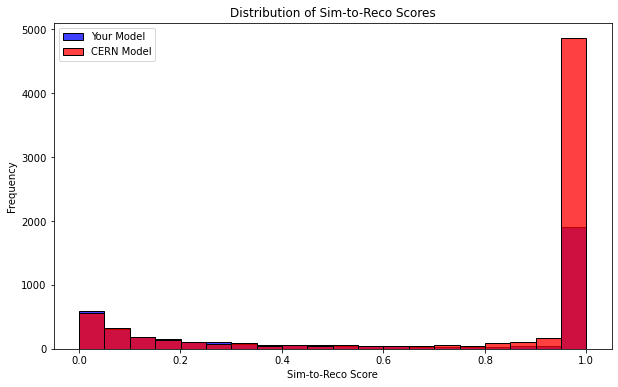

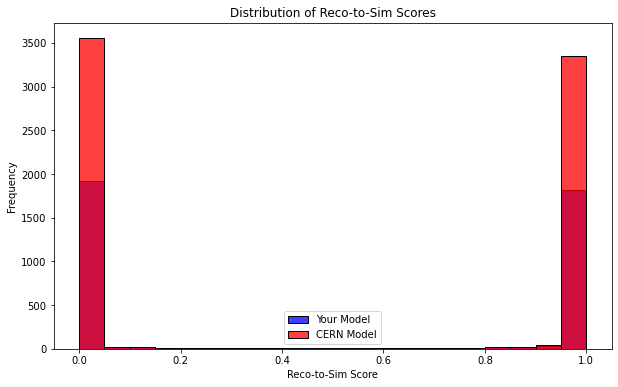

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Plotting Sim-to-Reco Score Distribution -----
plt.figure(figsize=(10, 6))
sns.histplot(df_scores['sim_to_reco_score'], bins=20, label='Your Model', color='blue')
sns.histplot(df_CERN['sim_to_reco_score'], bins=20, label='CERN Model', color='red')
plt.title('Distribution of Sim-to-Reco Scores')
plt.xlabel('Sim-to-Reco Score')
plt.ylabel('Frequency')

plt.legend()
plt.show()

# ----- Plotting Reco-to-Sim Score Distribution -----
plt.figure(figsize=(10, 6))
sns.histplot(df_scores['reco_to_sim_score'], bins=20, label='Your Model', color='blue')
sns.histplot(df_CERN['reco_to_sim_score'], bins=20, label='CERN Model', color='red')
plt.title('Distribution of Reco-to-Sim Scores')
plt.xlabel('Reco-to-Sim Score')
plt.ylabel('Frequency')

plt.legend()
plt.show()


In [52]:
# Assuming 'df' is your dataframe
max_sim_to_reco_score = df_CERN['sim_to_reco_score'].max()
max_reco_to_sim_score = df_CERN['reco_to_sim_score'].max()

print("Maximum sim-to-reco score:", max_sim_to_reco_score)
print("Maximum reco-to-sim score:", max_reco_to_sim_score)

Maximum sim-to-reco score: 1.0
Maximum reco-to-sim score: 1.0


# Plot vs params

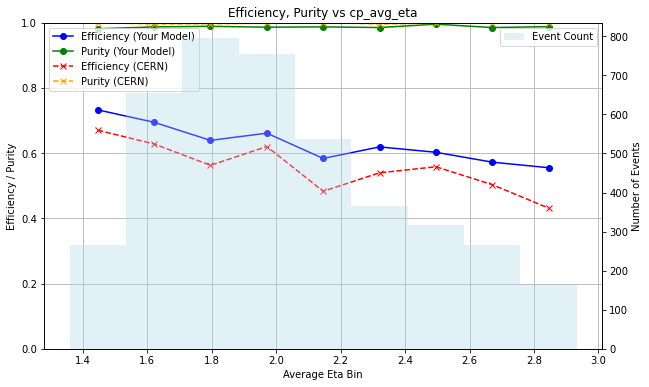

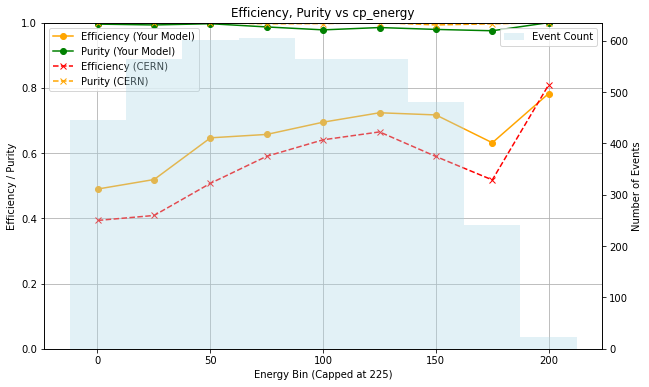

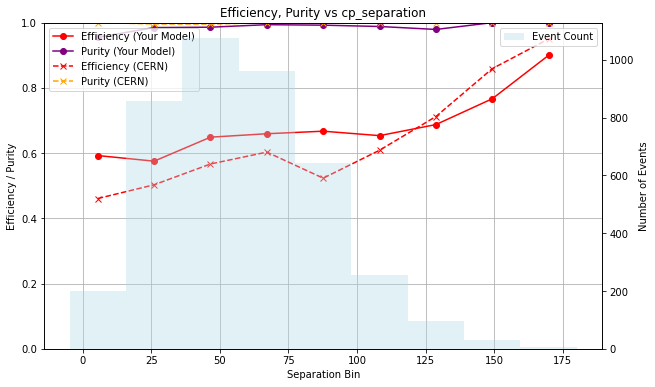

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---- Preprocessing ----
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

df_CERN['cp_id'] = pd.to_numeric(df_CERN['cp_id'], errors='coerce')
df_CERN['trackster_id'] = pd.to_numeric(df_CERN['trackster_id'], errors='coerce')

# Map Required Columns from df_scores to df_CERN
event_mapping = df_scores[['event_index', 'cp_avg_eta', 'cp_energy', 'cp_separation']].drop_duplicates('event_index')
df_CERN = pd.merge(df_CERN, event_mapping, on='event_index', how='left')

# ---- Efficiency and Purity Calculation ----
def calculate_efficiency_purity(df):
    # Efficiency
    cp_valid = df.dropna(subset=['cp_id']).copy()
    cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])
    cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2
    cp_efficiency = cp_associated.groupby(level=0).mean().reset_index(name='efficiency')
    cp_valid = cp_valid.merge(cp_efficiency, on='event_index', how='left')

    # Purity
    tst_valid = df.dropna(subset=['trackster_id']).copy()
    tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])
    tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2
    tst_purity = tst_associated.groupby(level=0).mean().reset_index(name='purity')
    tst_valid = tst_valid.merge(tst_purity, on='event_index', how='left')

    # Merge into a single DataFrame
    df_plot = pd.merge(cp_valid[['event_index', 'cp_avg_eta', 'cp_energy', 'cp_separation', 'efficiency']],
                       tst_valid[['event_index', 'purity']],
                       on='event_index',
                       how='inner')
    return df_plot

df_plot = calculate_efficiency_purity(df_scores)
df_plot_CERN = calculate_efficiency_purity(df_CERN)

# ---- Binning ----
eta_bins = np.linspace(df_plot['cp_avg_eta'].min(), df_plot['cp_avg_eta'].max(), 10)
energy_bins = np.linspace(df_plot['cp_energy'].min(), 225, 10)  # Capped at 225
separation_bins = np.linspace(df_plot['cp_separation'].min(), df_plot['cp_separation'].max(), 10)

df_plot['eta_bin'] = pd.cut(df_plot['cp_avg_eta'], bins=eta_bins, labels=False, include_lowest=True)
df_plot['energy_bin'] = pd.cut(df_plot['cp_energy'], bins=energy_bins, labels=False, include_lowest=True)
df_plot['separation_bin'] = pd.cut(df_plot['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

df_plot_CERN['eta_bin'] = pd.cut(df_plot_CERN['cp_avg_eta'], bins=eta_bins, labels=False, include_lowest=True)
df_plot_CERN['energy_bin'] = pd.cut(df_plot_CERN['cp_energy'], bins=energy_bins, labels=False, include_lowest=True)
df_plot_CERN['separation_bin'] = pd.cut(df_plot_CERN['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

def calculate_bin_error(numerator, denominator):
    if denominator > 0:
        efficiency = numerator / denominator
        error = np.sqrt(efficiency * (1 - efficiency) / denominator)
    else:
        efficiency = 0.0
        error = 0.0
    return efficiency, error

def aggregate_bins(data, bin_col):
    return data.groupby(bin_col).apply(lambda g: pd.Series({
        'efficiency_mean': g['efficiency'].mean(),
        'efficiency_error': calculate_bin_error(g['efficiency'].sum(), len(g))[1],
        'purity_mean': g['purity'].mean(),
        'purity_error': calculate_bin_error(g['purity'].sum(), len(g))[1],
        'count': len(g) // 4
    })).reset_index()

# Aggregate Data
eta_group = aggregate_bins(df_plot, 'eta_bin').set_index('eta_bin').reindex(range(len(eta_bins) - 1)).reset_index()
energy_group = aggregate_bins(df_plot, 'energy_bin').set_index('energy_bin').reindex(range(len(energy_bins) - 1)).reset_index()
separation_group = aggregate_bins(df_plot, 'separation_bin').set_index('separation_bin').reindex(range(len(separation_bins) - 1)).reset_index()

eta_group_CERN = aggregate_bins(df_plot_CERN, 'eta_bin').set_index('eta_bin').reindex(range(len(eta_bins) - 1)).reset_index()
energy_group_CERN = aggregate_bins(df_plot_CERN, 'energy_bin').set_index('energy_bin').reindex(range(len(energy_bins) - 1)).reset_index()
separation_group_CERN = aggregate_bins(df_plot_CERN, 'separation_bin').set_index('separation_bin').reindex(range(len(separation_bins) - 1)).reset_index()

# Fill Missing Values
for group in [eta_group_CERN, energy_group_CERN, separation_group_CERN]:
    group.fillna({'efficiency_mean': np.nan, 'efficiency_error': np.nan,
                  'purity_mean': np.nan, 'purity_error': np.nan, 'count': 0}, inplace=True)

# ---- Plotting ----
def plot_metric(x_bins, group, group_CERN, xlabel, ylabel, title, efficiency_color, purity_color):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Your Model
    ax1.plot(x_bins, group['efficiency_mean'], marker='o', linestyle='-', color=efficiency_color, label='Efficiency (Your Model)')
    ax1.plot(x_bins, group['purity_mean'], marker='o', linestyle='-', color=purity_color, label='Purity (Your Model)')

    # CERN Model
    ax1.plot(x_bins, group_CERN['efficiency_mean'], marker='x', linestyle='--', color='red', label='Efficiency (CERN)')
    ax1.plot(x_bins, group_CERN['purity_mean'], marker='x', linestyle='--', color='orange', label='Purity (CERN)')

    ax1.set_ylim(0, 1)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.legend(loc='upper left')
    ax1.grid()

    ax2.bar(x_bins, group['count'], width=(x_bins[1] - x_bins[0]), color='lightblue', alpha=0.35, label='Event Count')
    ax2.set_ylabel('Number of Events')
    ax2.legend(loc='upper right')

    plt.title(title)
    plt.show()

# Plot Each Metric
plot_metric(eta_bins[:-1], eta_group, eta_group_CERN, 'Average Eta Bin', 'Efficiency / Purity', 'Efficiency, Purity vs cp_avg_eta', 'blue', 'green')
plot_metric(energy_bins[:-1], energy_group, energy_group_CERN, 'Energy Bin (Capped at 225)', 'Efficiency / Purity', 'Efficiency, Purity vs cp_energy', 'orange', 'green')
plot_metric(separation_bins[:-1], separation_group, separation_group_CERN, 'Separation Bin', 'Efficiency / Purity', 'Efficiency, Purity vs cp_separation', 'red', 'purple')


# Plotting Sigma

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_energy_diff_vs_separation(df_scores):
    """
    Plot energy difference ratio metrics (mean and sigma) against CaloParticle separation.

    Parameters:
    - df_scores: DataFrame containing the calculated scores and features for events.

    Returns:
    - None (plots are displayed).
    """
    # Filter to include only associated events (reco-to-sim score < 0.2)
    associated_scores = df_scores[df_scores['reco_to_sim_score'] < 0.2]

    # Define bins for cp_separation
    separation_bins = np.linspace(associated_scores['cp_separation'].min(), associated_scores['cp_separation'].max(), 10)
    associated_scores['separation_bin'] = pd.cut(
        associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True
    )

    # Initialize lists to store results
    separation_bin_centers = []
    sigma_values = []
    mean_values = []
    event_counts = []

    # Loop through each separation bin
    for bin_idx in range(len(separation_bins) - 1):
        # Select data for the current bin
        bin_data = associated_scores[associated_scores['separation_bin'] == bin_idx]['energy_diff_ratio']
        
        # Skip if no data in this bin
        if bin_data.empty:
            continue
        
        # Fit a Gaussian to the data
        mu, sigma = norm.fit(bin_data)
        
        # Store results
        bin_center = (separation_bins[bin_idx] + separation_bins[bin_idx + 1]) / 2
        separation_bin_centers.append(bin_center)
        sigma_values.append(sigma)
        mean_values.append(mu)
        event_counts.append(len(bin_data))

        # Plot example histograms for the first and middle bins
        if bin_idx == 0 or bin_idx == len(separation_bins) // 2:
            plt.figure(figsize=(8, 6))
            plt.hist(bin_data, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
            xmin, xmax = plt.xlim()
            x = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x, mu, sigma)
            plt.plot(x, p, 'orange', label=f'Fit: μ={mu:.3f}, σ={sigma:.3f}')
            plt.title(f'Energy Difference Ratio (Separation Bin {bin_idx})\nμ={mu:.3f}, σ={sigma:.3f}, Events={len(bin_data)}')
            plt.xlabel('(Reconstructed Energy - True Energy) / True Energy')
            plt.ylabel('Density')
            plt.legend()
            plt.grid()
            plt.show()

    # Plot σ (sigma) vs Separation
    plt.figure(figsize=(10, 6))
    plt.plot(separation_bin_centers, sigma_values, 'o-', label='Sigma (σ)', color='blue')
    plt.xlabel('Separation')
    plt.ylabel('Sigma (σ)')
    plt.title('Sigma vs Separation')
    plt.grid()
    plt.legend()
    plt.show()

    # Plot μ (mean) vs Separation
    plt.figure(figsize=(10, 6))
    plt.plot(separation_bin_centers, mean_values, 'o-', label='Mean (μ)', color='green')
    plt.xlabel('Separation')
    plt.ylabel('Mean (μ)')
    plt.title('Mean vs Separation')
    plt.grid()
    plt.legend()
    plt.show()




/tmp/ipykernel_3787536/3855021492.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  associated_scores['separation_bin'] = pd.cut(associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)


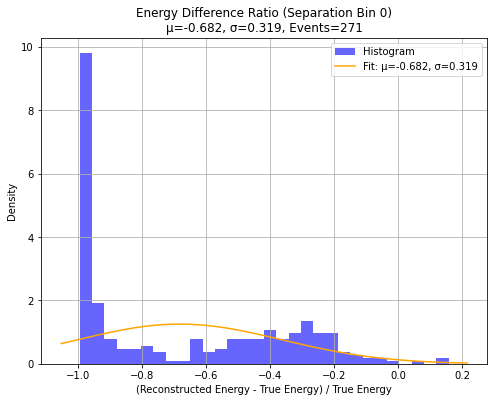

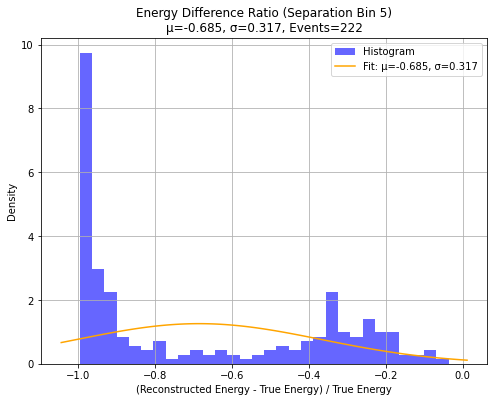

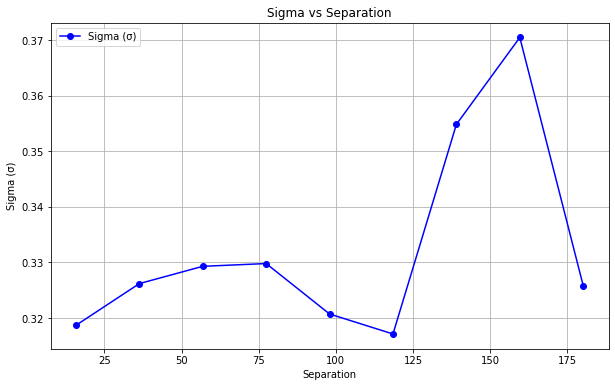

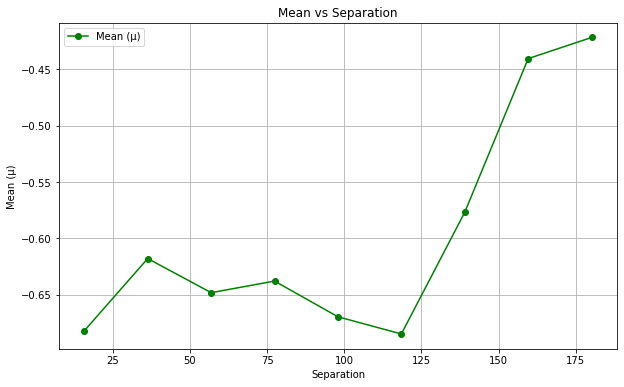

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Filter to include only associated events (reco-to-sim score < 0.2)
associated_scores = df_CERN[df_CERN['reco_to_sim_score'] < 0.2]

# Define bins for cp_separation
separation_bins = np.linspace(associated_scores['cp_separation'].min(), associated_scores['cp_separation'].max(), 10)
associated_scores['separation_bin'] = pd.cut(associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

# Initialize lists to store results
separation_bin_centers = []
sigma_values = []
mean_values = []
event_counts = []

# Loop through each separation bin
for bin_idx in range(len(separation_bins) - 1):
    # Select data for the current bin
    bin_data = associated_scores[associated_scores['separation_bin'] == bin_idx]['energy_diff_ratio']
    
    # Skip if no data in this bin
    if bin_data.empty:
        continue
    
    # Fit a Gaussian to the data
    mu, sigma = norm.fit(bin_data)
    
    # Store results
    bin_center = (separation_bins[bin_idx] + separation_bins[bin_idx + 1]) / 2
    separation_bin_centers.append(bin_center)
    sigma_values.append(sigma)
    mean_values.append(mu)
    event_counts.append(len(bin_data))

    # Plot a couple of example histograms for reference
    if bin_idx == 0 or bin_idx == len(separation_bins) // 2:  # Example: First and middle bins
        plt.figure(figsize=(8, 6))
        plt.hist(bin_data, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, sigma)
        plt.plot(x, p, 'orange', label=f'Fit: μ={mu:.3f}, σ={sigma:.3f}')
        plt.title(f'Energy Difference Ratio (Separation Bin {bin_idx})\nμ={mu:.3f}, σ={sigma:.3f}, Events={len(bin_data)}')
        plt.xlabel('(Reconstructed Energy - True Energy) / True Energy')
        plt.ylabel('Density')
        plt.legend()
        plt.grid()
        plt.show()

# Plot σ (sigma) vs Separation
plt.figure(figsize=(10, 6))
plt.plot(separation_bin_centers, sigma_values, 'o-', label='Sigma (σ)', color='blue')
plt.xlabel('Separation')
plt.ylabel('Sigma (σ)')
plt.title('Sigma vs Separation')
plt.grid()
plt.legend()
plt.show()

# Plot μ (mean) vs Separation
plt.figure(figsize=(10, 6))
plt.plot(separation_bin_centers, mean_values, 'o-', label='Mean (μ)', color='green')
plt.xlabel('Separation')
plt.ylabel('Mean (μ)')
plt.title('Mean vs Separation')
plt.grid()
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_scores is your DataFrame with all the relevant data
# Filter the DataFrame for reco-to-sim scores < 0.2
filtered_df = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Calculate the (pred - true) / true for energy_diff_ratio (or adjust the column name as needed)
# Assuming 'energy_diff_ratio' is the column of interest for (pred - true) / true
values = filtered_df['energy_diff_ratio']

# Plot the histogram
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(values, bins=50, density=True, alpha=0.7, label='Histogram')

# Fit a Gaussian distribution to the data
mu, sigma = np.mean(values), np.std(values)
x = np.linspace(bins[0], bins[-1], 1000)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
plt.plot(x, pdf, label=f'Fit: $\mu={mu:.3f}$, $\sigma={sigma:.3f}$', color='orange')

# Add labels and title
plt.title('(pred - true) / true for Reco-to-Sim Score < 0.2', fontsize=14)
plt.xlabel('(pred - true) / true', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Save or show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming df_scores is your DataFrame with all the relevant data
# Filter the DataFrame for tracksters that have been reconstructed (reco_to_sim_score < 0.2)
reconstructed_df = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Group the data into energy bins
energy_bins = np.linspace(reconstructed_df['trackster_energy'].min(), reconstructed_df['trackster_energy'].max(), 10)
reconstructed_df['energy_bin'] = pd.cut(reconstructed_df['trackster_energy'], bins=energy_bins)

# Initialize lists to store results
bin_centers = []
sigmas = []
means = []

# Loop over each bin
for energy_bin, group in reconstructed_df.groupby('energy_bin'):
    if group.empty:
        continue

    # Calculate the bin center
    bin_center = (energy_bin.left + energy_bin.right) / 2
    bin_centers.append(bin_center)

    # Fit a Gaussian to the (pred - true) / true values
    values = group['energy_diff_ratio']
    mu, sigma = norm.fit(values)

    # Store the mean and sigma
    means.append(mu)
    sigmas.append(sigma)

# Plot sigma vs. energy
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, sigmas, 'o-', label='Sigma')
plt.title('Resolution: Stochastic and Constant Terms')
plt.xlabel('Energy')
plt.ylabel('Sigma')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

# Plot mean vs. energy
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, means, 'o-', label='Mean')
plt.title('Mean vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Mean')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


# Test

In [46]:
print(df_CERN[df_CERN['event_index'] == 3])

    event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
22            3      0             0           1.000000           1.000000   
23            3      0             1           0.155196           0.000000   
24            3      0             2           0.942485           0.001164   
25            3      0             3           0.998729           0.000000   
26            3      1             0           0.823669           0.000000   
27            3      1             1           0.920148           0.998062   
28            3      1             2           0.993237           0.997592   
29            3      1             3           1.000000           1.000000   

    cp_energy_x  trackster_energy  cp_avg_eta_x  cp_separation_x  \
22   121.508577          3.614473      2.580636        43.345654   
23   121.508577         68.339877      2.580636        43.345654   
24   121.508577          7.255732      2.580636        43.345654   
25   121.508577          

In [25]:
CLUE_RtS = data_file['associations;1']['Mergetracksters_recoToSim_CP_score'].array()
CLUE_StR = data_file['associations;1']['Mergetracksters_simToReco_CP_score'].array()

In [45]:
print(CLUE_StR[3])

[[0.523, 0.838, 0.997, 1], [0.883, 0.997, 1, 1]]
